> # Case Study : Telecom Churn

## Steps:-
1. Importing Modules and Libraries
2. Read, understand and prepare the data
  1. Fix Missing Value
  2. Filter high-value customer
  3. Tag churners and remove attribute of the churn phase 
3. Exploratory Data Analysis
4. Modelling
6. Model accurance & Metrics
7. Final analysis and conclusions

## Contents:
1. Data Preparation
2. Buidling prediction model via logistic regression and Random Forest
3. using logistic regression to extract the top features / predictors

* Let us start with loading the required libraries</a>
* Also initialise the RANDOM_STATE global constant to use in the following sections.</a>

In [1]:
# lets import the required libraries and packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd/read_csv)
# Input data files are available in the "../input/" directory.

import io # Core tools for working with streams
import itertools # Functions creating iterators for efficient looping
import os # Miscellaneous operating system interfaces

# visualization
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns 

%matplotlib inline
from datetime import datetime as dt
from matplotlib.pyplot import xticks
from PIL import Image
RANDOM_STATE = 42
%matplotlib inline

# import matplotlib.ticker as mtick
# pd.set_option('display.max_columns', None)
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

py.init_notebook_mode(connected=True)

#ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# Metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#Balancing
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

# <a id='1'>1. Data</a>

* Read the data

In [2]:
# Reading Dataset
data = pd.read_csv("telecom_churn_data.csv")
# first few rows
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

## <a id='1'>1.1. Data overview</a>

In [3]:
# lets check the dimensions of the dataset
data.shape

(99999, 226)

In [4]:
# Missing data check

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


* Understand the data

In [5]:
print("Rows \t\t\t: ", data.shape[0])
print("Columns \t\t: ", data.shape[1])
print("\nFeatures \t\t: \n", data.columns.tolist())
print("\nMissing values  \t: ", data.isnull().sum().values.sum())
print("\nUnique values \t\t: \n", data.nunique())

Rows 			:  99999
Columns 		:  226

Features 		: 
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_

In [6]:
# lets check the missing data
missing_data(data)

Total  Percent
arpu_3g_6          74846    74.85
night_pck_user_6   74846    74.85
total_rech_data_6  74846    74.85
arpu_2g_6          74846    74.85
max_rech_data_6    74846    74.85
...                  ...      ...
max_rech_amt_7         0     0.00
max_rech_amt_6         0     0.00
total_rech_amt_9       0     0.00
total_rech_amt_8       0     0.00
sep_vbc_3g             0     0.00

[226 rows x 2 columns]

In [7]:
# find out the missing values
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
percent_1 = percent[percent > 0]
percent_1

arpu_3g_6               74.85
night_pck_user_6        74.85
total_rech_data_6       74.85
arpu_2g_6               74.85
max_rech_data_6         74.85
                        ...  
last_date_of_month_8     1.10
loc_ic_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_og_t2o_mou           1.02
last_date_of_month_7     0.60
Length: 166, dtype: float64

In [8]:
# number of coulmns with missing values
percent_1.shape

(166,)

In [9]:
# more than 70-75% missing values
percent_70 = percent[percent > 70]

In [10]:
# number of coulmns with more than 70-75% missing values
percent_70.shape

(40,)

### <a id='1'>Insights:</a>

1. There are 99999 rows and 226 columns
2. There are 3594931 missing values.
3. The data set has 166 (out of 226) columns with missing values
4. Among above 40 columns have more than 70% missing values
5. Various attributes with sufixes 6, 7, 8 and 9 which corresponds to months June , July, August and September respectively have missing values ~74%
6. Also each month data has same percent of missing values. Ex: All attributes with suffix 9 has 74.08% missing values

In [11]:
# Checking if all mobile numbers are unique thereby confirming all user entries are unique
data['mobile_number'].nunique()

99999

### <a id='1'>Insights:</a>

1. The number of unique mobile numbers is equal to the total number of rows present in the dataset
2. Hence mobile number can be used as a unique index to represent each customer/user

In [12]:
data.set_index('mobile_number', inplace = True)
data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7001865778           109             0.0             0.0             0.0   
7001625959           109             0.0             0.0             0.0   
7001204172           109             0.0             0.0             0.0   
7000142493           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7001865778               6/30/2014            7/31/2014            8/31/2014   
7001625959               6/30/2014            7/31/2014            8/31/2014   
7001204172               6/30/2014            7/31/2014            8/31/2014   
7000142493               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9   arpu_6   arpu_7  ...  sachet_3g_9  \
mobile_number                                         ...                
7000842753               9/30/2014  197.385  214.816  ...            0   
7001865778               9/30/2014   34.047  355.074  ...            0   
7001625959               9/30/2014  167.690  189.058  ...            0   
7001204172               9/30/2014  221.338  251.102  ...            0   
7000142493               9/30/2014  261.636  309.876  ...            0   

               fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  \
mobile_number                                                                 
7000842753           1.0        1.0        1.0        NaN   968        30.4   
7001865778           NaN        1.0        1.0        NaN  1006         0.0   
7001625959           NaN        NaN        NaN        1.0  1103         0.0   
7001204172           NaN        NaN        NaN        NaN  2491         0.0   
7000142493           0.0        NaN        NaN        NaN  1526         0.0   

               jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
mobile_number                                      
7000842753            0.0      101.20        3.58  
7001865778            0.0        0.00        0.00  
7001625959            0.0        4.17        0.00  
7001204172            0.0        0.00        0.00  
7000142493            0.0        0.00        0.00  

[5 rows x 225 columns]

In [13]:
# statistics
data.describe().round(2)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
count    99999.0         98981.0         98981.0         98981.0  99999.00   
mean       109.0             0.0             0.0             0.0    282.99   
std          0.0             0.0             0.0             0.0    328.44   
min        109.0             0.0             0.0             0.0  -2258.71   
25%        109.0             0.0             0.0             0.0     93.41   
50%        109.0             0.0             0.0             0.0    197.70   
75%        109.0             0.0             0.0             0.0    371.06   
max        109.0             0.0             0.0             0.0  27731.09   

         arpu_7    arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  ...  \
count  99999.00  99999.00  99999.00     96062.00     96140.00  ...   
mean     278.54    279.15    261.65       132.40       133.67  ...   
std      338.16    344.47    342.00       297.21       308.79  ...   
min    -2014.04   -945.81  -1899.50         0.00         0.00  ...   
25%       86.98     84.13     62.68         7.38         6.66  ...   
50%      191.64    192.08    176.85        34.31        32.33  ...   
75%      365.34    369.37    353.47       118.74       115.60  ...   
max    35145.83  33543.62  38805.62      7376.71      8157.78  ...   

       sachet_3g_9  fb_user_6  fb_user_7  fb_user_8  fb_user_9       aon  \
count     99999.00   25153.00   25571.00   26339.00   25922.00  99999.00   
mean          0.08       0.91       0.91       0.89       0.86   1219.85   
std           0.65       0.28       0.29       0.31       0.35    954.73   
min           0.00       0.00       0.00       0.00       0.00    180.00   
25%           0.00       1.00       1.00       1.00       1.00    467.00   
50%           0.00       1.00       1.00       1.00       1.00    863.00   
75%           0.00       1.00       1.00       1.00       1.00   1807.50   
max          49.00       1.00       1.00       1.00       1.00   4337.00   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
count    99999.00    99999.00    99999.00    99999.00  
mean        68.17       66.84       60.02        3.30  
std        267.58      271.20      253.94       32.41  
min          0.00        0.00        0.00        0.00  
25%          0.00        0.00        0.00        0.00  
50%          0.00        0.00        0.00        0.00  
75%          0.00        0.00        0.00        0.00  
max      12916.22     9165.60    11166.21     2618.57  

[8 rows x 213 columns]

# <a id='1'>2. Data Manipulation</a>

In [14]:
# converting all blank cells to NA(null values)
data = data.replace(" ", np.nan)
data.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
mobile_number                                                              
7000842753           109             0.0             0.0             0.0   
7001865778           109             0.0             0.0             0.0   
7001625959           109             0.0             0.0             0.0   
7001204172           109             0.0             0.0             0.0   
7000142493           109             0.0             0.0             0.0   

              last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753               6/30/2014            7/31/2014            8/31/2014   
7001865778               6/30/2014            7/31/2014            8/31/2014   
7001625959               6/30/2014            7/31/2014            8/31/2014   
7001204172               6/30/2014            7/31/2014            8/31/2014   
7000142493               6/30/2014            7/31/2014            8/31/2014   

              last_date_of_month_9   arpu_6   arpu_7  ...  sachet_3g_9  \
mobile_number                                         ...                
7000842753               9/30/2014  197.385  214.816  ...            0   
7001865778               9/30/2014   34.047  355.074  ...            0   
7001625959               9/30/2014  167.690  189.058  ...            0   
7001204172               9/30/2014  221.338  251.102  ...            0   
7000142493               9/30/2014  261.636  309.876  ...            0   

               fb_user_6  fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  \
mobile_number                                                                 
7000842753           1.0        1.0        1.0        NaN   968        30.4   
7001865778           NaN        1.0        1.0        NaN  1006         0.0   
7001625959           NaN        NaN        NaN        1.0  1103         0.0   
7001204172           NaN        NaN        NaN        NaN  2491         0.0   
7000142493           0.0        NaN        NaN        NaN  1526         0.0   

               jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
mobile_number                                      
7000842753            0.0      101.20        3.58  
7001865778            0.0        0.00        0.00  
7001625959            0.0        4.17        0.00  
7001204172            0.0        0.00        0.00  
7000142493            0.0        0.00        0.00  

[5 rows x 225 columns]

In [15]:
data[percent[percent == 73.66].index].describe()

total_rech_data_8     arpu_3g_8     fb_user_8  night_pck_user_8  \
count       26339.000000  26339.000000  26339.000000      26339.000000   
mean            2.651999     91.173849      0.890808          0.020844   
std             3.074987    188.180936      0.311885          0.142863   
min             1.000000    -24.490000      0.000000          0.000000   
25%             1.000000      0.000000      1.000000          0.000000   
50%             1.000000      0.880000      1.000000          0.000000   
75%             3.000000    122.070000      1.000000          0.000000   
max            60.000000   3716.900000      1.000000          1.000000   

       av_rech_amt_data_8  max_rech_data_8  count_rech_3g_8     arpu_2g_8  \
count        26339.000000     26339.000000     26339.000000  26339.000000   
mean           197.526489       125.717301         0.635711     86.599478   
std            191.301305       109.437851         1.422827    168.247852   
min              0.500000         1.000000         0.000000    -55.830000   
25%             87.000000        25.000000         0.000000      0.000000   
50%            154.000000       145.000000         0.000000      9.270000   
75%            252.000000       179.000000         1.000000    122.070000   
max           4076.000000      1555.000000        45.000000   3483.170000   

       count_rech_2g_8  
count     26339.000000  
mean          2.016288  
std           2.720132  
min           0.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max          44.000000

In [16]:
data[percent[percent == 74.08].index].describe()

total_rech_data_9  count_rech_3g_9     fb_user_9  max_rech_data_9  \
count       25922.000000     25922.000000  25922.000000      25922.00000   
mean            2.441170         0.659363      0.860968        124.94144   
std             2.516339         1.411513      0.345987        111.36376   
min             1.000000         0.000000      0.000000          1.00000   
25%             1.000000         0.000000      1.000000         25.00000   
50%             2.000000         0.000000      1.000000        145.00000   
75%             3.000000         1.000000      1.000000        179.00000   
max            84.000000        49.000000      1.000000       1555.00000   

          arpu_3g_9  night_pck_user_9     arpu_2g_9  count_rech_2g_9  \
count  25922.000000      25922.000000  25922.000000     25922.000000   
mean     100.264116          0.015971     93.712026         1.781807   
std      216.291992          0.125366    171.384224         2.214701   
min      -71.090000          0.000000    -45.740000         0.000000   
25%        0.000000          0.000000      0.000000         1.000000   
50%        2.605000          0.000000     14.800000         1.000000   
75%      140.010000          0.000000    140.010000         2.000000   
max    13884.310000          1.000000   3467.170000        40.000000   

       av_rech_amt_data_9  
count        25922.000000  
mean           192.734315  
std            188.400286  
min              1.000000  
25%             69.000000  
50%            164.000000  
75%            252.000000  
max           4061.000000

In [17]:
data[percent[percent == 74.43].index].describe()

total_rech_data_7     fb_user_7  max_rech_data_7  night_pck_user_7  \
count       25571.000000  25571.000000     25571.000000      25571.000000   
mean            2.666419      0.908764       126.729459          0.023034   
std             3.031593      0.287950       109.765267          0.150014   
min             1.000000      0.000000         1.000000          0.000000   
25%             1.000000      1.000000        25.000000          0.000000   
50%             1.000000      1.000000       145.000000          0.000000   
75%             3.000000      1.000000       177.000000          0.000000   
max            54.000000      1.000000      1555.000000          1.000000   

       count_rech_2g_7  av_rech_amt_data_7     arpu_2g_7  count_rech_3g_7  \
count     25571.000000        25571.000000  25571.000000     25571.000000   
mean          2.044699          200.981292     85.914450         0.621720   
std           2.768332          196.791224    176.379871         1.394524   
min           0.000000            0.500000    -15.480000         0.000000   
25%           1.000000           92.000000      0.000000         0.000000   
50%           1.000000          154.000000      8.810000         0.000000   
75%           2.000000          252.000000    122.070000         1.000000   
max          48.000000         4365.000000   4809.360000        35.000000   

          arpu_3g_7  
count  25571.000000  
mean      89.384120  
std      195.893924  
min      -26.040000  
25%        0.000000  
50%        0.420000  
75%      119.560000  
max     4980.900000

In [18]:
data[percent[percent == 74.85].index].describe()

arpu_3g_6  night_pck_user_6  total_rech_data_6     arpu_2g_6  \
count  25153.000000      25153.000000       25153.000000  25153.000000   
mean      89.555057          0.025086           2.463802     86.398003   
std      193.124653          0.156391           2.789128    172.767523   
min      -30.820000          0.000000           1.000000    -35.830000   
25%        0.000000          0.000000           1.000000      0.000000   
50%        0.480000          0.000000           1.000000     10.830000   
75%      122.070000          0.000000           3.000000    122.070000   
max     6362.280000          1.000000          61.000000   6433.760000   

       max_rech_data_6     fb_user_6  av_rech_amt_data_6  count_rech_2g_6  \
count     25153.000000  25153.000000        25153.000000     25153.000000   
mean        126.393392      0.914404          192.600982         1.864668   
std         108.477235      0.279772          192.646318         2.570254   
min           1.000000      0.000000            1.000000         0.000000   
25%          25.000000      1.000000           82.000000         1.000000   
50%         145.000000      1.000000          154.000000         1.000000   
75%         177.000000      1.000000          252.000000         2.000000   
max        1555.000000      1.000000         7546.000000        42.000000   

       count_rech_3g_6  
count     25153.000000  
mean          0.599133  
std           1.274428  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max          29.000000

### <a id='1'>Insights: (Missing value columns)</a>

1. The minimum values for the columns indicating "Average revenue per user" for various months are negative. This seems little off as revenue cannot be negative in this case but zero
2. For rest columns the minimum value is either zero or one
3. Hence imputing all the negative and blank cells with zero as it will not interfere with any statistics or the modelling process

## <a id='1'>2.1. Fix Missing Value</a>

* Fix missing values of more than 70%
* 6,7,8,9 reperesent month as june, july, august, september 

In [19]:
months = {"June": 6, "July": 7, "August": 8, "September": 9}
month_list = {}

# append all months columns in month_list
for i in months:
    month_list[i] = list(percent_70[percent_70.index.str.contains(str(months[i]))].index)

print(month_list, '\n')

for i in month_list:
    print('\n', i)
    print(100*data[month_list[i]].isnull().all(axis = 1).value_counts()/data.shape[0])

{'June': ['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6'], 'July': ['date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7'], 'August': ['total_rech_data_8', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8'], 'September': ['total_rech_data_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'av_rech_amt_data_9']} 


 June
True     74.846748
False    25.153252
dtype: float64

 July
True     74.428744
False    25.571256
dtype: float64

 August
True     73.660737
False    26.339263
dtype: float64

 September
True    

In [20]:
# Imputing blanks with zero for columns having > 70% missing values
for i in month_list:
    data[month_list[i]] = data[month_list[i]].fillna(value = 0)

In [21]:
percent_1.value_counts()

3.94     29
5.38     29
3.86     29
7.75     29
74.08    10
73.66    10
74.85    10
74.43    10
1.02      3
4.76      1
3.62      1
1.66      1
1.61      1
1.77      1
1.10      1
0.60      1
dtype: int64

In [22]:
# quick check on each percentage values (3.94)
percent_1[percent_1 == 3.94]

std_ic_t2f_mou_6    3.94
ic_others_6         3.94
isd_ic_mou_6        3.94
std_ic_t2m_mou_6    3.94
std_ic_mou_6        3.94
spl_ic_mou_6        3.94
std_ic_t2o_mou_6    3.94
loc_ic_t2f_mou_6    3.94
loc_ic_t2t_mou_6    3.94
std_og_t2c_mou_6    3.94
std_og_t2f_mou_6    3.94
std_og_mou_6        3.94
std_og_t2m_mou_6    3.94
isd_og_mou_6        3.94
std_og_t2t_mou_6    3.94
spl_og_mou_6        3.94
loc_og_mou_6        3.94
og_others_6         3.94
loc_og_t2c_mou_6    3.94
loc_og_t2m_mou_6    3.94
loc_og_t2f_mou_6    3.94
loc_og_t2t_mou_6    3.94
roam_og_mou_6       3.94
std_ic_t2t_mou_6    3.94
onnet_mou_6         3.94
loc_ic_mou_6        3.94
offnet_mou_6        3.94
roam_ic_mou_6       3.94
loc_ic_t2m_mou_6    3.94
dtype: float64

In [23]:
# quick check on each percentage values (3.86)
percent_1[percent_1 == 3.86]

loc_og_t2c_mou_7    3.86
roam_ic_mou_7       3.86
loc_og_mou_7        3.86
loc_og_t2t_mou_7    3.86
offnet_mou_7        3.86
loc_og_t2f_mou_7    3.86
std_og_t2t_mou_7    3.86
std_ic_t2t_mou_7    3.86
onnet_mou_7         3.86
std_og_t2m_mou_7    3.86
loc_og_t2m_mou_7    3.86
std_og_t2f_mou_7    3.86
roam_og_mou_7       3.86
std_og_t2c_mou_7    3.86
std_ic_t2m_mou_7    3.86
isd_og_mou_7        3.86
ic_others_7         3.86
loc_ic_t2f_mou_7    3.86
loc_ic_t2m_mou_7    3.86
std_ic_mou_7        3.86
loc_ic_t2t_mou_7    3.86
std_ic_t2f_mou_7    3.86
loc_ic_mou_7        3.86
spl_ic_mou_7        3.86
og_others_7         3.86
spl_og_mou_7        3.86
isd_ic_mou_7        3.86
std_ic_t2o_mou_7    3.86
std_og_mou_7        3.86
dtype: float64

In [24]:
# quick check on each percentage values (5.38)
percent_1[percent_1 == 5.38]

onnet_mou_8         5.38
std_ic_t2t_mou_8    5.38
std_ic_mou_8        5.38
loc_ic_t2t_mou_8    5.38
roam_og_mou_8       5.38
std_ic_t2m_mou_8    5.38
loc_ic_mou_8        5.38
std_ic_t2f_mou_8    5.38
roam_ic_mou_8       5.38
std_ic_t2o_mou_8    5.38
loc_og_t2t_mou_8    5.38
loc_ic_t2f_mou_8    5.38
offnet_mou_8        5.38
loc_ic_t2m_mou_8    5.38
loc_og_t2m_mou_8    5.38
isd_og_mou_8        5.38
ic_others_8         5.38
og_others_8         5.38
spl_ic_mou_8        5.38
loc_og_t2f_mou_8    5.38
std_og_t2m_mou_8    5.38
spl_og_mou_8        5.38
std_og_t2c_mou_8    5.38
isd_ic_mou_8        5.38
loc_og_t2c_mou_8    5.38
std_og_t2f_mou_8    5.38
std_og_t2t_mou_8    5.38
loc_og_mou_8        5.38
std_og_mou_8        5.38
dtype: float64

In [25]:
# quick check on each percentage values (7.75)
percent_1[percent_1 == 7.75]

ic_others_9         7.75
std_og_mou_9        7.75
std_og_t2c_mou_9    7.75
isd_ic_mou_9        7.75
std_ic_mou_9        7.75
isd_og_mou_9        7.75
spl_og_mou_9        7.75
spl_ic_mou_9        7.75
og_others_9         7.75
loc_ic_t2t_mou_9    7.75
std_ic_t2o_mou_9    7.75
loc_ic_t2m_mou_9    7.75
std_ic_t2f_mou_9    7.75
loc_ic_t2f_mou_9    7.75
loc_ic_mou_9        7.75
std_ic_t2m_mou_9    7.75
std_og_t2f_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2t_mou_9    7.75
loc_og_mou_9        7.75
roam_og_mou_9       7.75
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_9    7.75
roam_ic_mou_9       7.75
offnet_mou_9        7.75
loc_og_t2c_mou_9    7.75
loc_og_t2t_mou_9    7.75
std_og_t2m_mou_9    7.75
onnet_mou_9         7.75
dtype: float64

### <a id='1'>Insights:</a>

1. Similar to 70% missing values here too, each month data has same number of missing values (29 columns of each percentage)
2. Hence the first four values in above output with 29 columns for each percentages can be imputed with zero as it will not affect the results. The reason all above 29 coulmns correspond to call details like local, std and other service usage details.

In [26]:
percent_3 = percent_1[percent_1 >= 3.8]
    
months = {"June": 6, "July": 7, "August": 8, "September": 9}
month_list = {}

# append all months columns in month_list
for i in months:
    month_list[i] = list(percent_3[percent_3.index.str.contains(str(months[i]))].index)

for i in month_list:
    print('\n', i)
    print(100*data[month_list[i]].isnull().all(axis = 1).value_counts()/data.shape[0])


 June
False    100.0
dtype: float64

 July
False    100.0
dtype: float64

 August
False    100.0
dtype: float64

 September
False    100.0
dtype: float64


In [27]:
for i in month_list:
    data[month_list[i]] = data[month_list[i]].fillna(value = 0)

In [28]:
# Final check on remaining missing values
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
percent_1 = percent[percent > 0]
print(percent_1.shape)
percent_1

(9,)


date_of_last_rech_8     3.62
date_of_last_rech_7     1.77
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
last_date_of_month_8    1.10
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
loc_og_t2o_mou          1.02
last_date_of_month_7    0.60
dtype: float64

### <a id='1'>Insights:</a>

1. Last date of month is missing for few months which can be easily imputed with last date
2. Date of recharge for each month can be imputed as zero as it indicates no charge

In [29]:
# Check the date columns which are of data type object and convert to date/time format
date_columns = data.columns[data.columns.str.contains('date')]
date_columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [30]:
# Converting all dates to YYYY-MM-DD
data[date_columns] = data[date_columns].apply(pd.to_datetime)
data[date_columns].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
mobile_number                                                                  
7000842753              2014-06-30           2014-07-31           2014-08-31   
7001865778              2014-06-30           2014-07-31           2014-08-31   
7001625959              2014-06-30           2014-07-31           2014-08-31   
7001204172              2014-06-30           2014-07-31           2014-08-31   
7000142493              2014-06-30           2014-07-31           2014-08-31   

              last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
mobile_number                                                                
7000842753              2014-09-30          2014-06-21          2014-07-16   
7001865778              2014-09-30          2014-06-29          2014-07-31   
7001625959              2014-09-30          2014-06-17          2014-07-24   
7001204172              2014-09-30          2014-06-28          2014-07-31   
7000142493              2014-09-30          2014-06-26          2014-07-28   

              date_of_last_rech_8 date_of_last_rech_9  \
mobile_number                                           
7000842753             2014-08-08          2014-09-28   
7001865778             2014-08-28          2014-09-30   
7001625959             2014-08-14          2014-09-29   
7001204172             2014-08-31          2014-09-30   
7000142493             2014-08-09          2014-09-28   

              date_of_last_rech_data_6 date_of_last_rech_data_7  \
mobile_number                                                     
7000842753                  2014-06-21               2014-07-16   
7001865778                  1970-01-01               2014-07-25   
7001625959                  1970-01-01               1970-01-01   
7001204172                  1970-01-01               1970-01-01   
7000142493                  2014-06-04               1970-01-01   

              date_of_last_rech_data_8 date_of_last_rech_data_9  
mobile_number                                                    
7000842753                  2014-08-08               1970-01-01  
7001865778                  2014-08-10               1970-01-01  
7001625959                  1970-01-01               2014-09-17  
7001204172                  1970-01-01               1970-01-01  
7000142493                  1970-01-01               1970-01-01

In [31]:
# last_date_of_month_9
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].unique()[0])
# last_date_of_month_8
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].unique()[0])
# last_date_of_month_7
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].unique()[0])

In [32]:
# date_of_last_rech_8
data['date_of_last_rech_8'] = data['date_of_last_rech_8'].fillna(value = 0)
# date_of_last_rech_7
data['date_of_last_rech_7'] = data['date_of_last_rech_7'].fillna(value = 0)
# date_of_last_rech_6
data['date_of_last_rech_6'] = data['date_of_last_rech_6'].fillna(value = 0)

In [33]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False).round(2)
percent_1 = percent[percent > 0]
percent_1

std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
loc_og_t2o_mou    1.02
dtype: float64

## <a id='1'>2.2. Filter high-value customers</a>

1. As mentioned in the problem statement / business instructions, only for the high-value customers churn has to be predicted.
2. Definition of high-value customers: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [34]:
# Recharge columns
recharge_data = data.columns[data.columns.str.contains('rech')]
recharge_data

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

* To find the total recharge amount of data, multiply total recharge data with average recharge amount of data

In [35]:
# finding recharge amount for data
data['total_rech_amt_data_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_rech_amt_data_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7
data['total_rech_amt_data_8'] = data.total_rech_data_8 * data.av_rech_amt_data_8

* Add a new columns to show high value customer data

In [36]:
# creating new feature to filter high value customers
# Average recharge amount for good period (month 6 & 7)
data['average_amt_good'] = (data['total_rech_amt_6']+ data['total_rech_amt_7']+ data['total_rech_amt_data_6'] 
                            + data['total_rech_amt_data_7'])/4

In [37]:
recharge_amt_data = data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7','average_amt_good']]
recharge_amt_data.head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_data_6  \
mobile_number                                                              
7000842753                  362               252                  252.0   
7001865778                   74               384                    0.0   
7001625959                  168               315                    0.0   
7001204172                  230               310                    0.0   
7000142493                  196               350                   56.0   

               total_rech_amt_data_7  average_amt_good  
mobile_number                                           
7000842753                     252.0            279.50  
7001865778                     154.0            153.00  
7001625959                       0.0            120.75  
7001204172                       0.0            135.00  
7000142493                       0.0            150.50

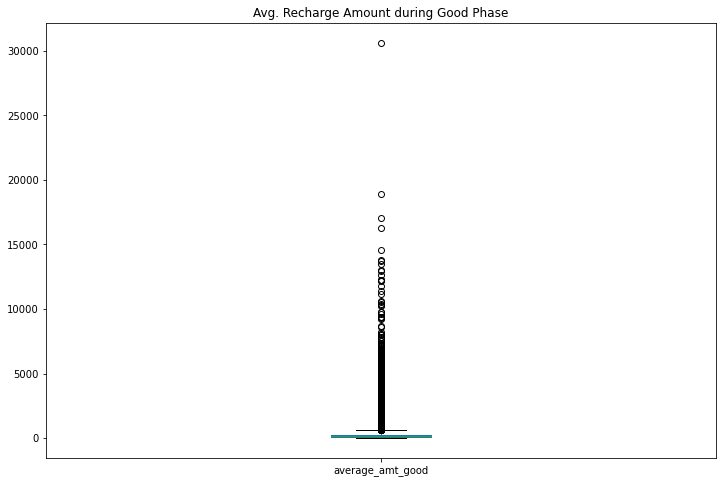

In [38]:
plt.figure(figsize = (12,8))
data['average_amt_good'].plot(kind='box')
plt.title('Avg. Recharge Amount during Good Phase')
plt.show()

In [39]:
data['average_amt_good'].describe(percentiles=[.25,.5,.70,.75,.80,.90,.95,.96,.97,.98,.99]).round(2)

count    99999.00
mean       242.66
std        434.71
min          0.00
25%         64.00
50%        137.50
70%        239.00
75%        276.50
80%        328.25
90%        514.00
95%        756.00
96%        859.25
97%        995.75
98%       1210.01
99%       1681.76
max      30618.00
Name: average_amt_good, dtype: float64

### <a id='1'>Insights:</a>

1. The presence of outliers are evident from the box plot
2. Outlier treatment might be needed

In [40]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
A = data['average_amt_good'].quantile(0.7)
high_value_df = data[(data['average_amt_good'] >= A)]
high_value_df.shape

(30001, 229)

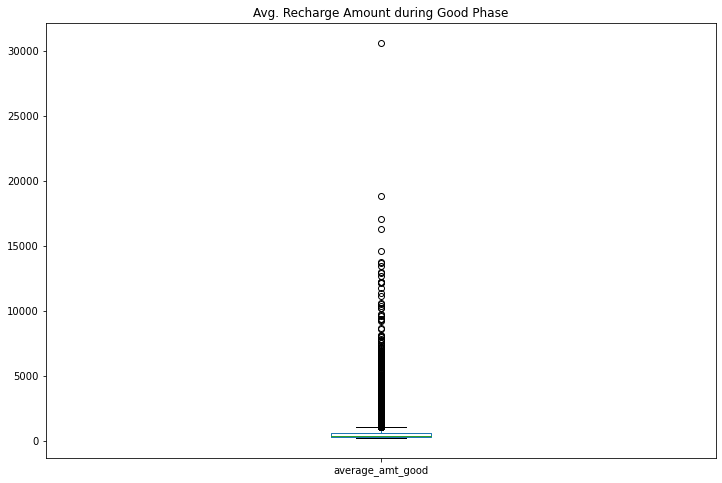

In [41]:
plt.figure(figsize = (12,8))
high_value_df['average_amt_good'].plot(kind='box')
plt.title('Avg. Recharge Amount during Good Phase')
plt.show()

In [42]:
high_value_df['average_amt_good'].describe(percentiles=[.70,.80,.90,.95,.99,.997,.999]).round(2)

count    30001.00
mean       576.31
std        679.36
min        239.00
50%        400.00
70%        546.25
80%        684.00
90%        995.75
95%       1399.25
99%       3045.25
99.7%     5470.50
99.9%     8704.25
max      30618.00
Name: average_amt_good, dtype: float64

### <a id='1'>Insights:</a>

1. In both abohighval_finalve the box plots it is very evident that after 99% the outlier presence is very high
2. In order to get a decent model and also not loose any important data: data point upto 99% is considered

In [43]:
B = data['average_amt_good'].quantile(0.99)
high_value = high_value_df[(high_value_df['average_amt_good'] <= B)]
high_value.shape

(29001, 229)

In [44]:
high_val_final = high_value.copy()

In [45]:
# Deleting the remaining blank / NA values
high_val_final = high_val_final.dropna(how='any',axis=0)

In [46]:
missing_data(high_val_final)

Total  Percent
circle_id                0      0.0
max_rech_amt_6           0      0.0
max_rech_amt_8           0      0.0
max_rech_amt_9           0      0.0
date_of_last_rech_6      0      0.0
...                    ...      ...
total_og_mou_6           0      0.0
total_og_mou_7           0      0.0
total_og_mou_8           0      0.0
total_og_mou_9           0      0.0
average_amt_good         0      0.0

[229 rows x 2 columns]

### <a id='1'>Insights:</a>

1. The data is clean now and can be used for further process

### <a id='1'>2.3. Tag churners and remove attribute of the churn phase</a>

Churned customers (churn=1, else 0) can be tagged based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes that need to be used to tag churners are:
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

In [47]:
high_val_final[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
mobile_number                                                          
7000842753               0.00            0.00         0.00         0.00
7000701601               0.00            0.00         0.00         0.00
7001524846              34.91          142.18         0.00         0.00
7002124215             252.61         1031.53         0.00         0.00
7000887461             127.48          127.63        13.93       314.74

In [48]:
#Creating column for churn and classifying churned customers, Initially set all the values as 0
high_val_final['churn'] = 0
high_val_final['churn'].head()

mobile_number
7000842753    0
7000701601    0
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int64

In [49]:
# set all which having is_churned True condition as 1
churned = (high_val_final.total_ic_mou_9 == 0) & (high_val_final.total_og_mou_9 == 0) & (high_val_final.vol_2g_mb_9 == 0) & (high_val_final.vol_3g_mb_9 == 0)
high_val_final.loc[churned,'churn'] = 1

In [50]:
# Churn Rate %
round(100*high_val_final.churn.sum()/len(churned),2)

7.98

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

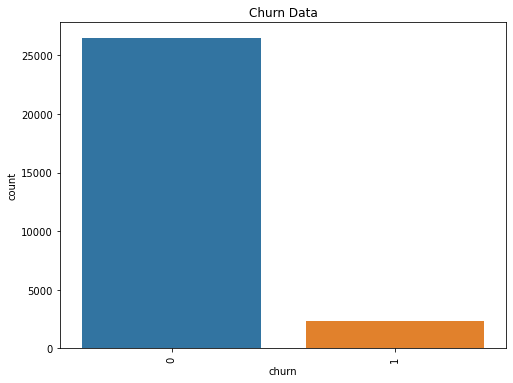

In [51]:
plt.figure(figsize=(8, 6)) 
plt.title("Churn Data")
sns.countplot(x = "churn", data = high_val_final)
xticks(rotation = 90)

### <a id='1'>Insights:</a>

1. The churn rate is 7.98%
2. From the rate and plot it is very clear that there is high imbalance

In [52]:
# Deleting all columns of month 9 as these values have to be predicted
month_9 = high_val_final.columns[high_val_final.columns.str.contains('_9')]
month_9

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [53]:
high_val_final.drop(month_9, axis=1, inplace = True)
high_val_final.shape

(28788, 176)

### <a id='1'>3. Exploratory Data Analysis (EDA)</a>

As mentioned in the business statement below steps will be performed now
1. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
2. Derive new features

Churned =  871.8619939050936
Not Churned =  1252.0717979691217


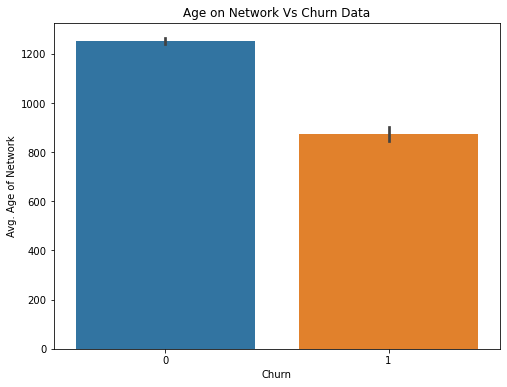

In [54]:
# AON(Age on network) - number of days the customer is using the operator T network
plt.figure(figsize=(8,6))
plt.title("Age on Network Vs Churn Data")
sns.barplot(x = 'churn', y = 'aon', data = high_val_final)
plt.ylabel('Avg. Age of Network')
plt.xlabel('Churn')
print("Churned = ", high_val_final.loc[high_val_final.churn == 1, 'aon'].mean())
print("Not Churned = ", high_val_final.loc[high_val_final.churn == 0, 'aon'].mean())

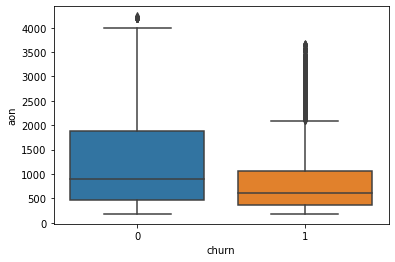

In [55]:
sns.boxplot(y = 'aon', x = 'churn', data = high_val_final)
plt.show()

### <a id='1'>Insights:</a>

1. Age on network seem to be good indicator or churn
2. The average age on network for churned customers approximately around 870 days

Churned =  771.4140182847192
Not Churned =  630.1905930315957


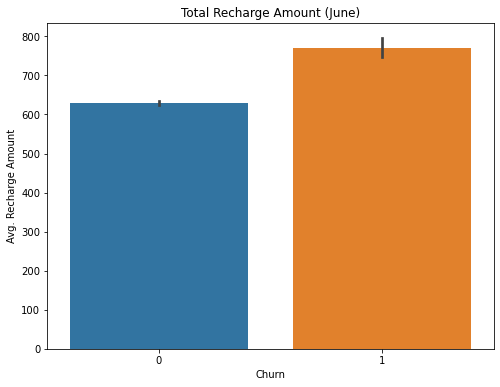

In [56]:
# Total Recharge Amount
# June
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'total_rech_amt_6', data = high_val_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", high_val_final.loc[high_val_final.churn == 1, 'total_rech_amt_6'].mean())
print("Not Churned = ", high_val_final.loc[high_val_final.churn == 0, 'total_rech_amt_6'].mean())

Churned =  613.2263822377014
Not Churned =  642.2913442301159


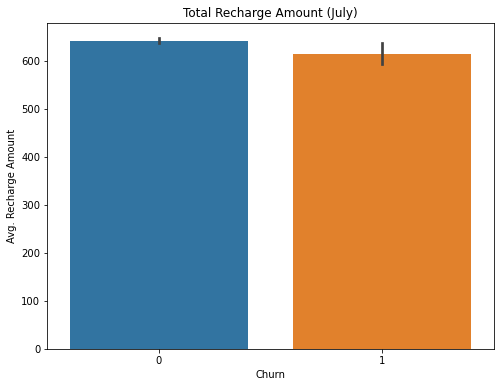

In [57]:
# July
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'total_rech_amt_7', data = high_val_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", high_val_final.loc[high_val_final.churn == 1, 'total_rech_amt_7'].mean())
print("Not Churned = ", high_val_final.loc[high_val_final.churn == 0, 'total_rech_amt_7'].mean())

Churned =  244.32477144101
Not Churned =  596.1673398512703


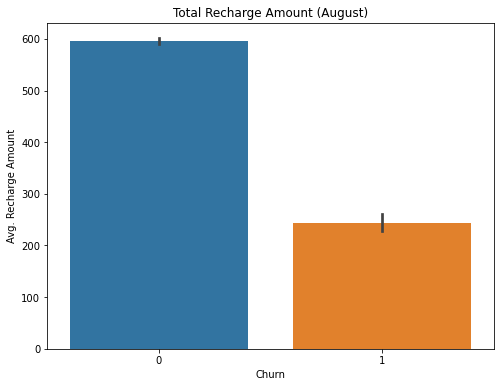

In [58]:
plt.figure(figsize=(8,6))
plt.title("Total Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'total_rech_amt_8', data = high_val_final)
plt.ylabel('Avg. Recharge Amount')
plt.xlabel('Churn')
print("Churned = ", high_val_final.loc[high_val_final.churn == 1, 'total_rech_amt_8'].mean())
print("Not Churned = ", high_val_final.loc[high_val_final.churn == 0, 'total_rech_amt_8'].mean())

### <a id='1'>Insights:</a>

1. The average total recharge amount is highest for churned customers during the good phase
2. The average total recharge amount has dropped significantly for churned customers during action phase

In [59]:
# Creating a new feature for total recharge amount during good phase
high_val_final["total_rech_amt_goodphase"] = (high_val_final.total_rech_amt_6 + high_val_final.total_rech_amt_7)/2
# Dropping the original columns for good phase
high_val_final.drop(['total_rech_amt_6','total_rech_amt_7'], inplace=True, axis=1)

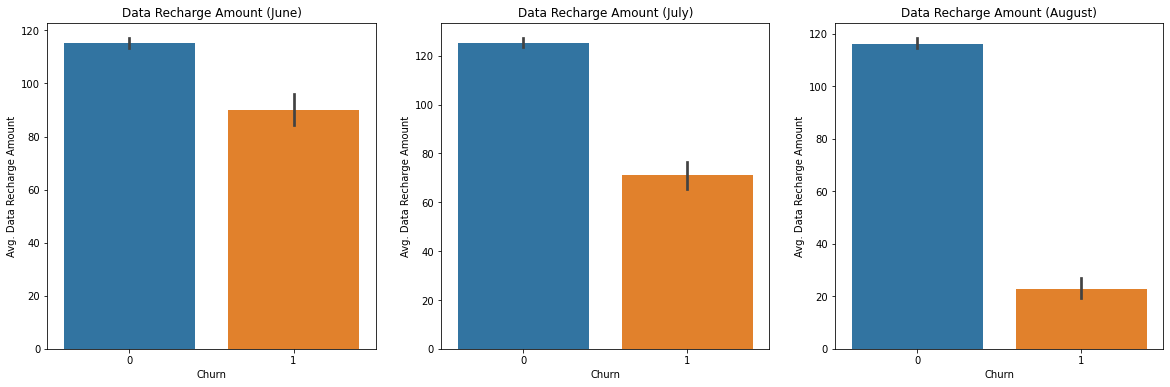

In [60]:
# Average Recharge Amount - Data
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Data Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_6', data = high_val_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Data Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_7', data = high_val_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Data Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'av_rech_amt_data_8', data = high_val_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. The average data recharge amount is lower for churned customers than Non churned customers

In [61]:
# Fidning the total data recharge amount
high_val_final["total_rech_amt_data_6"] = high_val_final.total_rech_data_6*high_val_final.av_rech_amt_data_6
high_val_final["total_rech_amt_data_7"] = high_val_final.total_rech_data_7*high_val_final.av_rech_amt_data_7
high_val_final["total_rech_amt_data_8"] = high_val_final.total_rech_data_8*high_val_final.av_rech_amt_data_8

In [62]:
# Creating a new feature for total data recharge amount during good phase
high_val_final["total_rech_amt_data_goodphase"] = (high_val_final.total_rech_amt_data_6 + high_val_final.total_rech_amt_data_7)/2

# Creating a new feature for total data + calls recharge amount during good phase
high_val_final["overall_rech_amt_goodphase"] = high_val_final.total_rech_amt_goodphase + high_val_final.total_rech_amt_data_goodphase

In [63]:
# Dropping the original columns for good phase

high_val_final.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6',
                    'av_rech_amt_data_7','av_rech_amt_data_8'], axis=1, inplace=True)

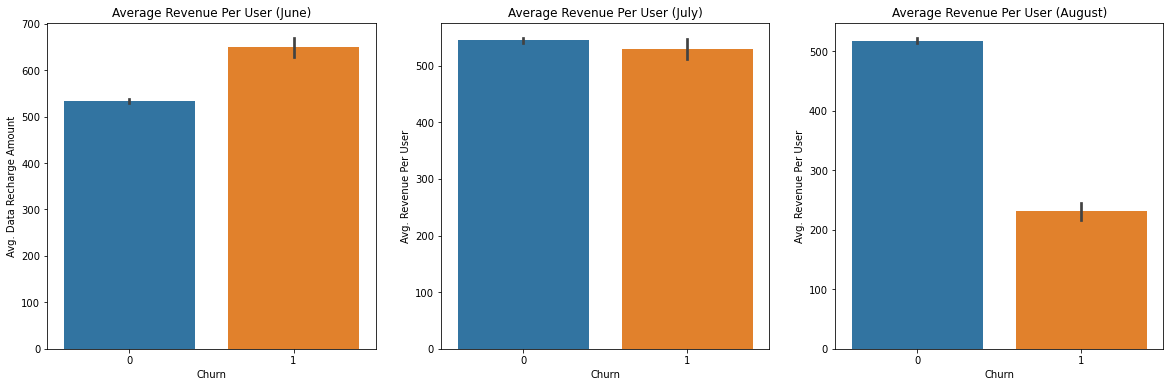

In [64]:
# ARPU - Average Revenue Per User

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Average Revenue Per User (June)")
sns.barplot(x = 'churn', y = 'arpu_6', data = high_val_final)
plt.ylabel('Avg. Data Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Average Revenue Per User (July)")
sns.barplot(x = 'churn', y = 'arpu_7', data = high_val_final)
plt.ylabel('Avg. Revenue Per User')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Average Revenue Per User (August)")
sns.barplot(x = 'churn', y = 'arpu_8', data = high_val_final)
plt.ylabel('Avg. Revenue Per User')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. Churned customers have the highest drop in average revenue/user compared to non-churned customers between good and action phase

In [65]:
# Creating a new variable for Average Revenue Per User in good phase
high_val_final["arpu_goodphase"] = (high_val_final.arpu_6 + high_val_final.arpu_7)/2

# Dropping the original columns for good phase                    
high_val_final.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

Text(0.5, 0, 'Churn')

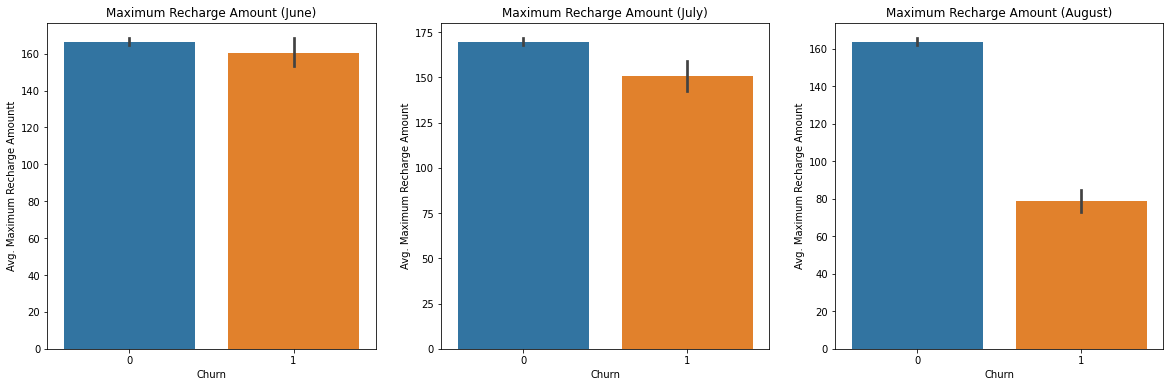

In [66]:
# Maximum Recharge Amount

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Maximum Recharge Amount (June)")
sns.barplot(x = 'churn', y = 'max_rech_amt_6', data = high_val_final)
plt.ylabel('Avg. Maximum Recharge Amountt')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Maximum Recharge Amount (July)")
sns.barplot(x = 'churn', y = 'max_rech_amt_7', data = high_val_final)
plt.ylabel('Avg. Maximum Recharge Amount')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Maximum Recharge Amount (August)")
sns.barplot(x = 'churn', y = 'max_rech_amt_8', data = high_val_final)
plt.ylabel('Avg. Maximum Recharge Amount')
plt.xlabel('Churn')


### <a id='1'>Insights:</a>

1. Churned customers have the highest drop in avg. max recharge amount compared to non-churned customers between good and action phase

In [67]:
# Creating a new variable for avg. max recharge amount in good phase
high_val_final["max_rech_amt_calls_goodphase"] = (high_val_final.max_rech_amt_6 + high_val_final.max_rech_amt_7)/2

# Dropping the original columns for good phase                    
high_val_final.drop(['max_rech_amt_6','max_rech_amt_7'], axis=1, inplace=True)

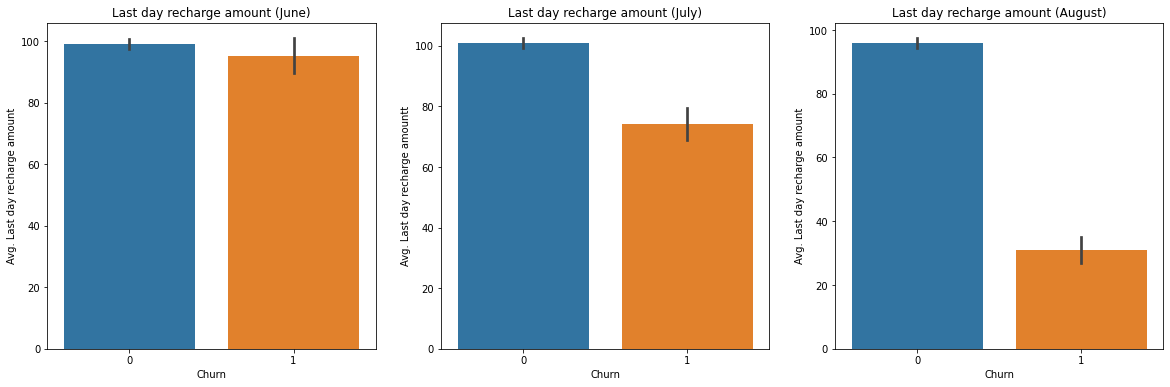

In [68]:
# last_day_rch_amt (rch = recharge, amt = amount)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Last day recharge amount (June)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_6', data = high_val_final)
plt.ylabel('Avg. Last day recharge amount')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Last day recharge amount (July)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_7', data = high_val_final)
plt.ylabel('Avg. Last day recharge amountt')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Last day recharge amount (August)")
sns.barplot(x = 'churn', y = 'last_day_rch_amt_8', data = high_val_final)
plt.ylabel('Avg. Last day recharge amount')
plt.xlabel('Churn')
plt.show()

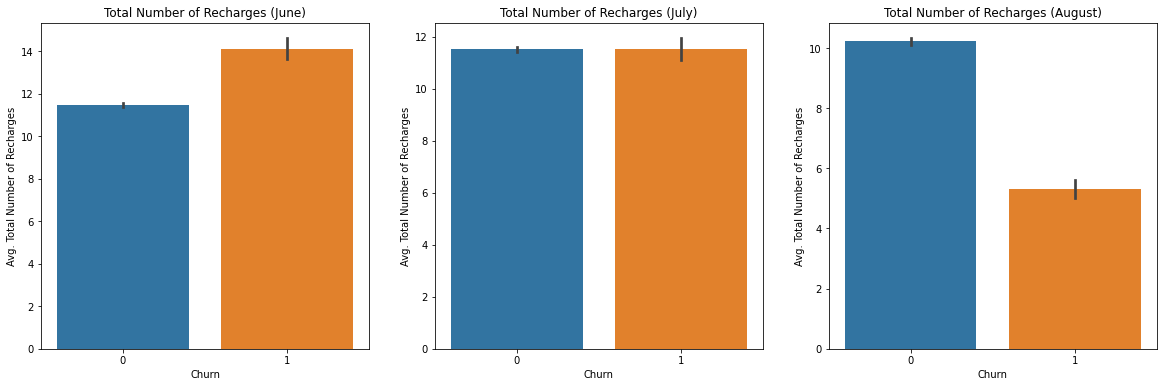

In [69]:
# total_rech_num
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Total Number of Recharges (June)")
sns.barplot(x = 'churn', y = 'total_rech_num_6', data = high_val_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Total Number of Recharges (July)")
sns.barplot(x = 'churn', y = 'total_rech_num_7', data = high_val_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Total Number of Recharges (August)")
sns.barplot(x = 'churn', y = 'total_rech_num_8', data = high_val_final)
plt.ylabel('Avg. Total Number of Recharges')
plt.xlabel('Churn')
plt.show()

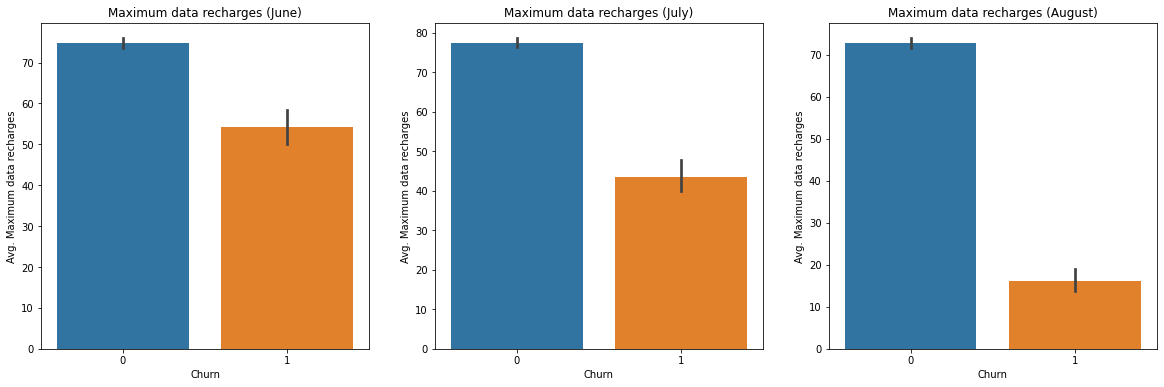

In [70]:
# max_rech_data

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Maximum data recharges (June)")
sns.barplot(x = 'churn', y = 'max_rech_data_6', data = high_val_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Maximum data recharges (July)")
sns.barplot(x = 'churn', y = 'max_rech_data_7', data = high_val_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Maximum data recharges (August)")
sns.barplot(x = 'churn', y = 'max_rech_data_8', data = high_val_final)
plt.ylabel('Avg. Maximum data recharges')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. Churned customers have the highest drop in last day recharge amount, max recharge and total recharge values compared to non-churned customers between good and action phase

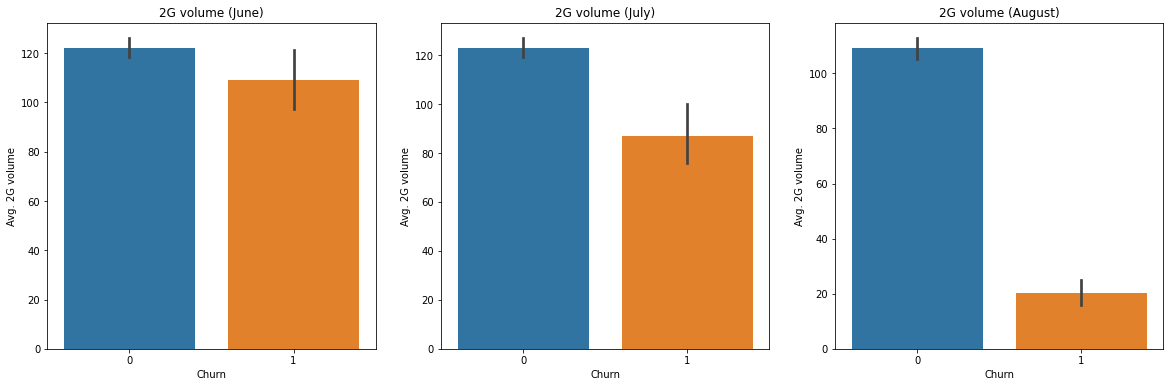

In [71]:
# vol_2g_mb

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("2G volume (June)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_6', data = high_val_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("2G volume (July)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_7', data = high_val_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("2G volume (August)")
sns.barplot(x = 'churn', y = 'vol_2g_mb_8', data = high_val_final)
plt.ylabel('Avg. 2G volume')
plt.xlabel('Churn')
plt.show()

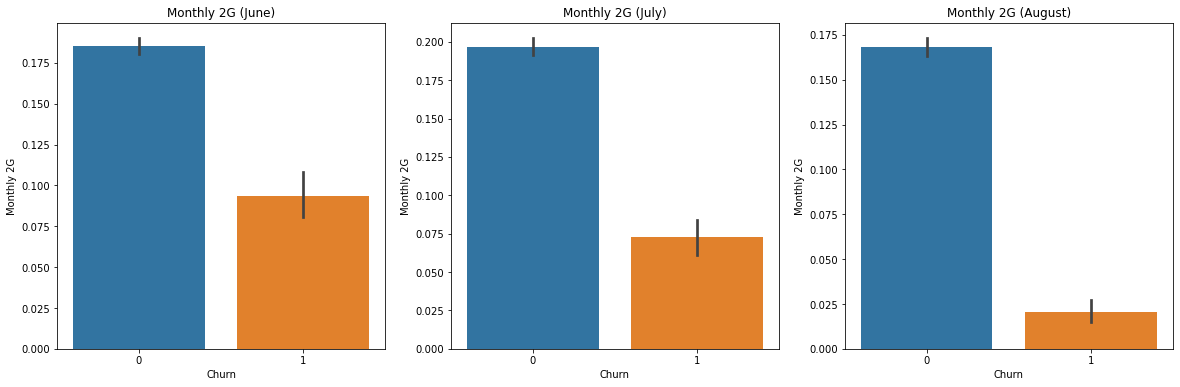

In [72]:
# monthly_2g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Monthly 2G (June)")
sns.barplot(x = 'churn', y = 'monthly_2g_6', data = high_val_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Monthly 2G (July)")
sns.barplot(x = 'churn', y = 'monthly_2g_7', data = high_val_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Monthly 2G (August)")
sns.barplot(x = 'churn', y = 'monthly_2g_8', data = high_val_final)
plt.ylabel('Monthly 2G')
plt.xlabel('Churn')
plt.show()

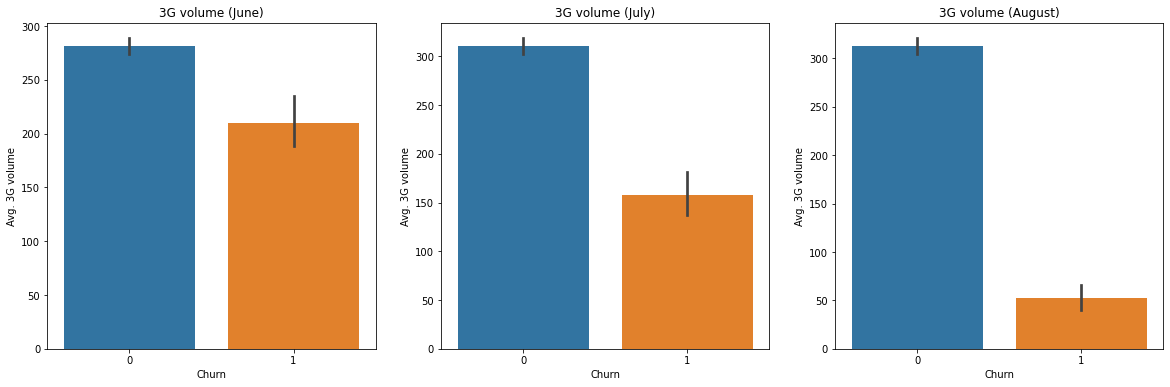

In [73]:
# vol_3g_mb

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("3G volume (June)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_6', data = high_val_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("3G volume (July)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_7', data = high_val_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("3G volume (August)")
sns.barplot(x = 'churn', y = 'vol_3g_mb_8', data = high_val_final)
plt.ylabel('Avg. 3G volume')
plt.xlabel('Churn')
plt.show()

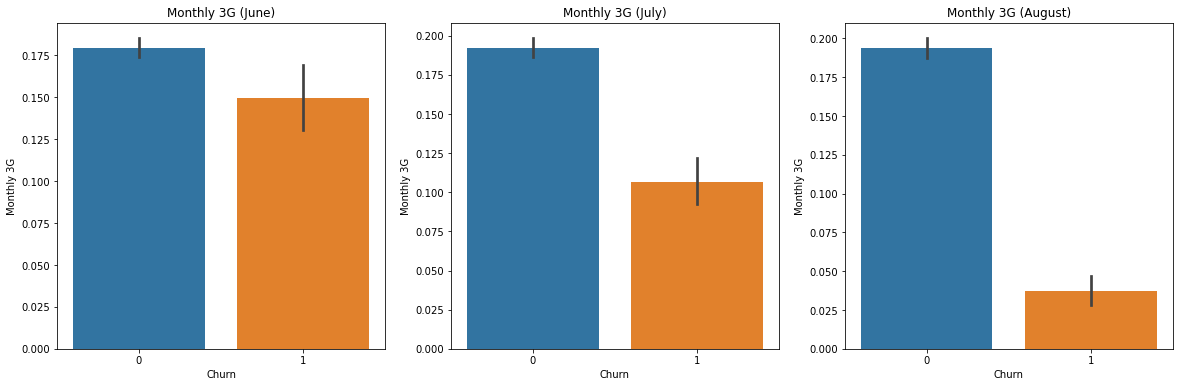

In [74]:
# monthly_3g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Monthly 3G (June)")
sns.barplot(x = 'churn', y = 'monthly_3g_6', data = high_val_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Monthly 3G (July)")
sns.barplot(x = 'churn', y = 'monthly_3g_7', data = high_val_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Monthly 3G (August)")
sns.barplot(x = 'churn', y = 'monthly_3g_8', data = high_val_final)
plt.ylabel('Monthly 3G')
plt.xlabel('Churn')
plt.show()

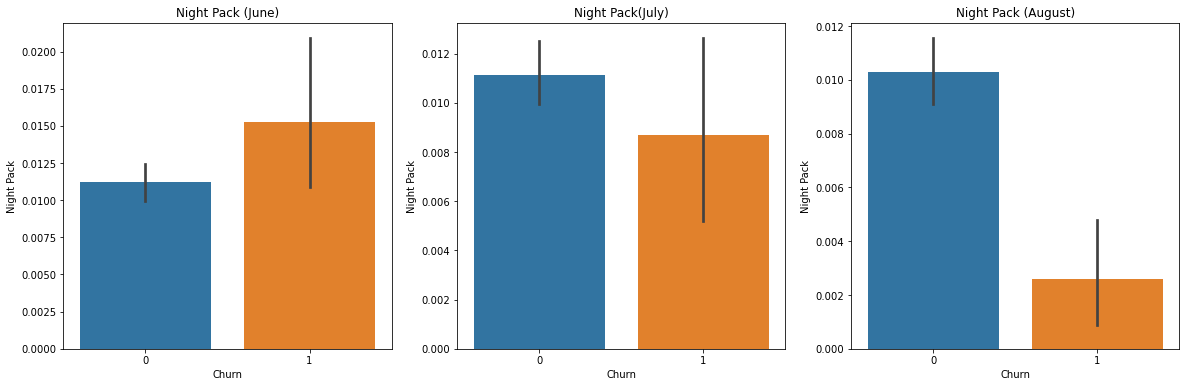

In [75]:
# night_pck_user

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Night Pack (June)")
sns.barplot(x = 'churn', y = 'night_pck_user_6', data = high_val_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Night Pack(July)")
sns.barplot(x = 'churn', y = 'night_pck_user_7', data = high_val_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Night Pack (August)")
sns.barplot(x = 'churn', y = 'night_pck_user_8', data = high_val_final)
plt.ylabel('Night Pack')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. Different data packs have significant impact on churn rate between good and action phase

In [76]:
# Creating a new variable for monthly 2G and 3G
high_val_final["monthly_2g_goodphase"] = (high_val_final.monthly_2g_6 + high_val_final.monthly_2g_7)/2
high_val_final["monthly_3g_goodphase"] = (high_val_final.monthly_3g_6 + high_val_final.monthly_3g_7)/2

# Dropping the original columns for good phase
high_val_final.drop(['monthly_2g_6','monthly_2g_7','monthly_3g_6','monthly_3g_7'], axis=1, inplace=True)

In [77]:
# Creating a new variable for 2G and 3G Volumes
high_val_final["vol_2g_mb_goodphase"] = (high_val_final.vol_2g_mb_6 + high_val_final.vol_2g_mb_7)/2
high_val_final["vol_3g_mb_goodphase"] = (high_val_final.vol_3g_mb_6 + high_val_final.vol_3g_mb_7)/2

# Dropping the original columns for good phase
high_val_final.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7'], axis=1, inplace=True)

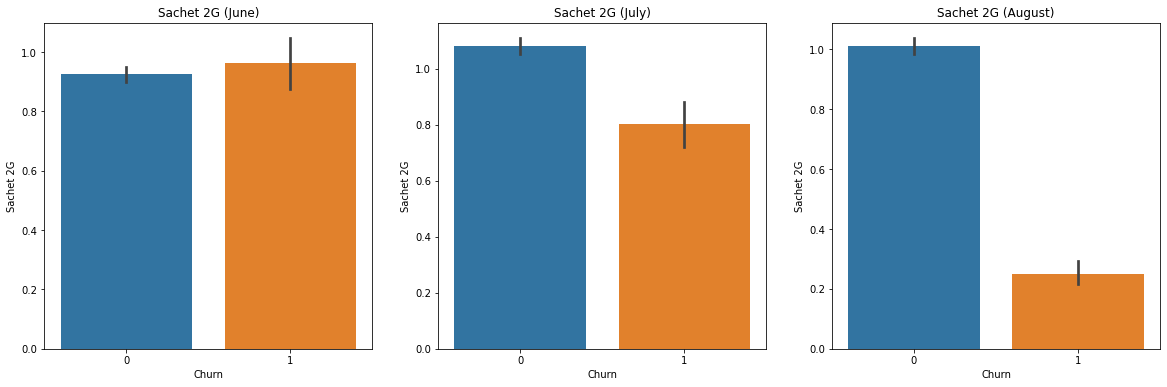

In [78]:
# sachet_2g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Sachet 2G (June)")
sns.barplot(x = 'churn', y = 'sachet_2g_6', data = high_val_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Sachet 2G (July)")
sns.barplot(x = 'churn', y = 'sachet_2g_7', data = high_val_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Sachet 2G (August)")
sns.barplot(x = 'churn', y = 'sachet_2g_8', data = high_val_final)
plt.ylabel('Sachet 2G')
plt.xlabel('Churn')
plt.show()

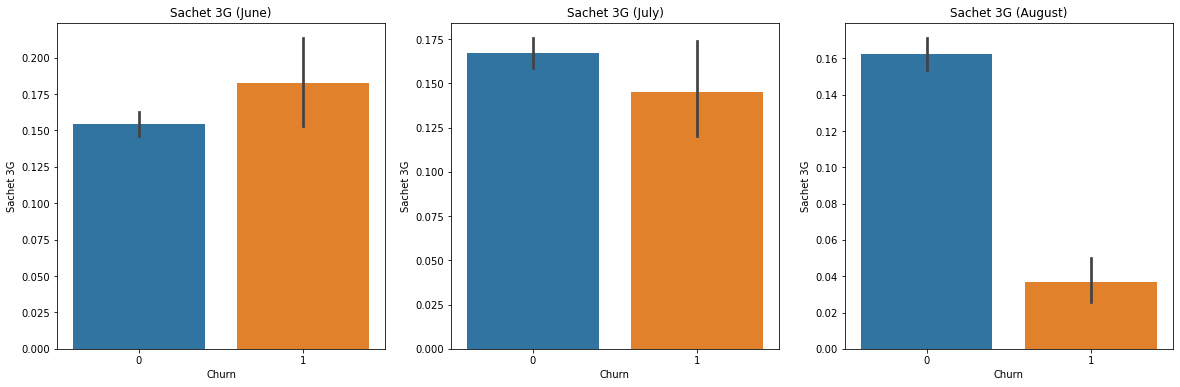

In [79]:
# sachet_3g

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Sachet 3G (June)")
sns.barplot(x = 'churn', y = 'sachet_3g_6', data = high_val_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Sachet 3G (July)")
sns.barplot(x = 'churn', y = 'sachet_3g_7', data = high_val_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Sachet 3G (August)")
sns.barplot(x = 'churn', y = 'sachet_3g_8', data = high_val_final)
plt.ylabel('Sachet 3G')
plt.xlabel('Churn')
plt.show()

In [80]:
# Creating a new variable for sachet 2G and 3G
high_val_final["sachet_2g_goodphase"] = (high_val_final.sachet_2g_6 + high_val_final.sachet_2g_7)/2
high_val_final["sachet_3g_goodphase"] = (high_val_final.sachet_3g_6 + high_val_final.sachet_3g_7)/2

# Dropping the original columns for good phase
high_val_final.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6','sachet_3g_7'], axis=1, inplace=True)

In [81]:
# Volume based cost - when no specific scheme is not purchased and paid as per usage
# changing the Volume based cost column names same as others
high_val_final.rename(columns= {'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8'}, inplace=True)
high_val_final.drop('sep_vbc_3g', axis = 1, inplace=True)

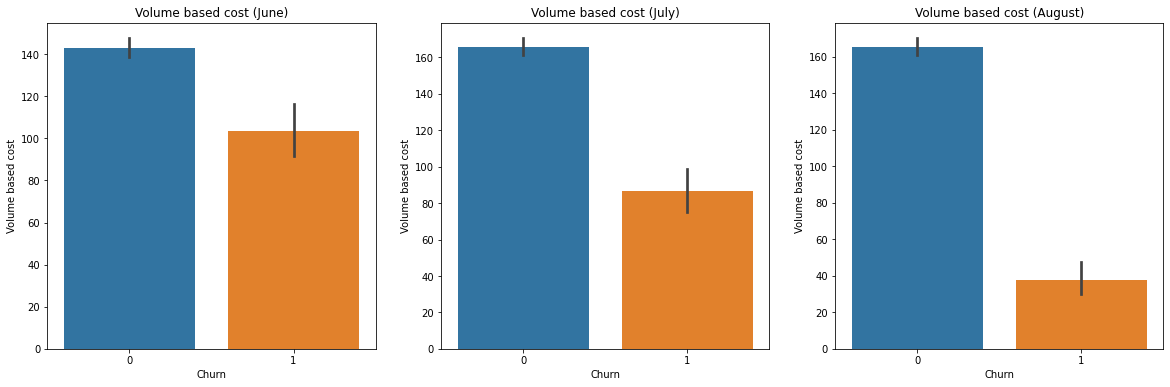

In [82]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Volume based cost (June)")
sns.barplot(x = 'churn', y = 'vbc_3g_6', data = high_val_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Volume based cost (July)")
sns.barplot(x = 'churn', y = 'vbc_3g_7', data = high_val_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Volume based cost (August)")
sns.barplot(x = 'churn', y = 'vbc_3g_8', data = high_val_final)
plt.ylabel('Volume based cost')
plt.xlabel('Churn')
plt.show()

In [83]:
# Creating a new variable for VBC
high_val_final["vbc_3g_goodphase"] = (high_val_final.vbc_3g_6 + high_val_final.vbc_3g_7)/2

# Dropping the original columns for good phase
high_val_final.drop(['vbc_3g_6','vbc_3g_7'], axis=1, inplace=True)

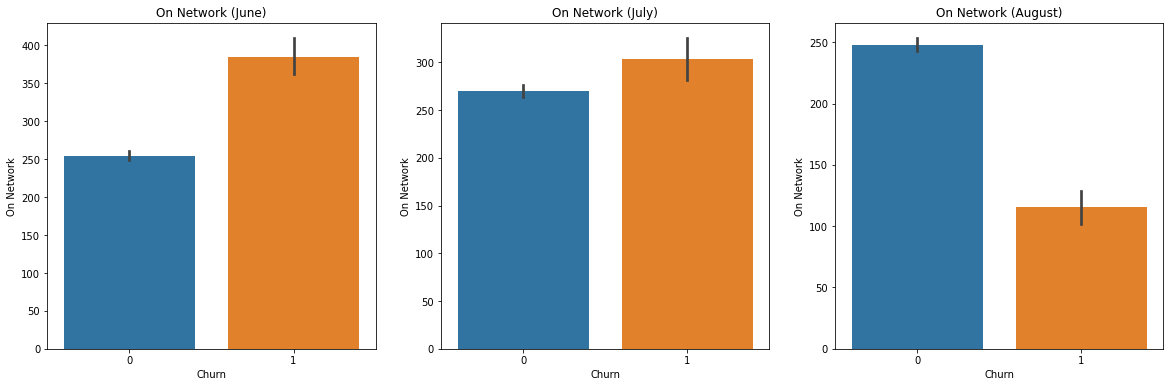

In [84]:
# All kind of calls within the same operator network - onnet

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("On Network (June)")
sns.barplot(x = 'churn', y = 'onnet_mou_6', data = high_val_final)
plt.ylabel('On Network')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("On Network (July)")
sns.barplot(x = 'churn', y = 'onnet_mou_7', data = high_val_final)
plt.ylabel('On Network')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("On Network (August)")
sns.barplot(x = 'churn', y = 'onnet_mou_8', data = high_val_final)
plt.ylabel('On Network')
plt.xlabel('Churn')
plt.show()

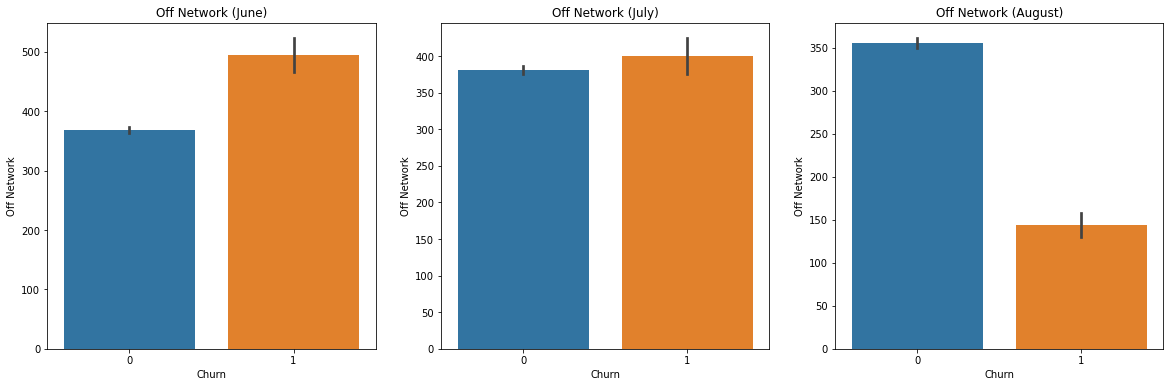

In [85]:
# All kind of calls outside the operator T network - offnet

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Off Network (June)")
sns.barplot(x = 'churn', y = 'offnet_mou_6', data = high_val_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Off Network (July)")
sns.barplot(x = 'churn', y = 'offnet_mou_7', data = high_val_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Off Network (August)")
sns.barplot(x = 'churn', y = 'offnet_mou_8', data = high_val_final)
plt.ylabel('Off Network')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. Churned customers have the highest drop in VBC, sachet 2g/3g and onnet/offnet values compared to non-churned customers between good and action phase

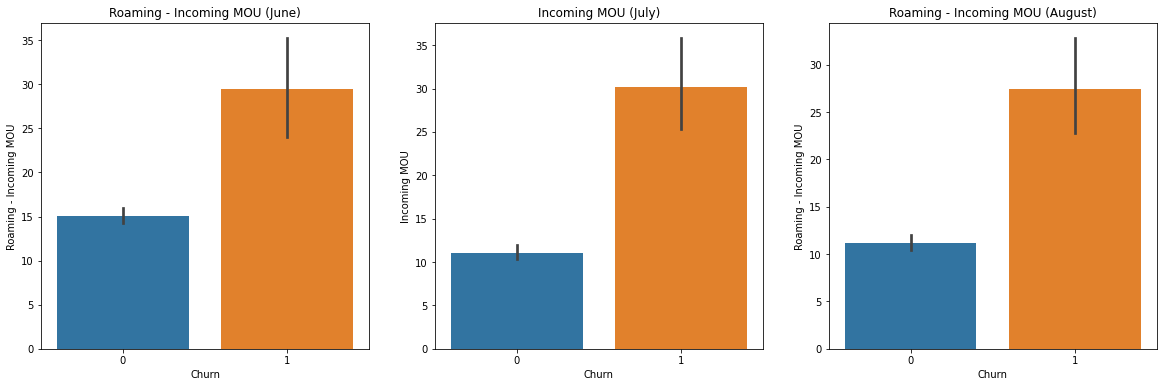

In [86]:
# Roaming Minutes of usage (voice calls) - Incoming calls

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Roaming - Incoming MOU (June)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_6', data = high_val_final)
plt.ylabel('Roaming - Incoming MOU')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Incoming MOU (July)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_7', data = high_val_final)
plt.ylabel('Incoming MOU')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Roaming - Incoming MOU (August)")
sns.barplot(x = 'churn', y = 'roam_ic_mou_8', data = high_val_final)
plt.ylabel('Roaming - Incoming MOU')
plt.xlabel('Churn')
plt.show()

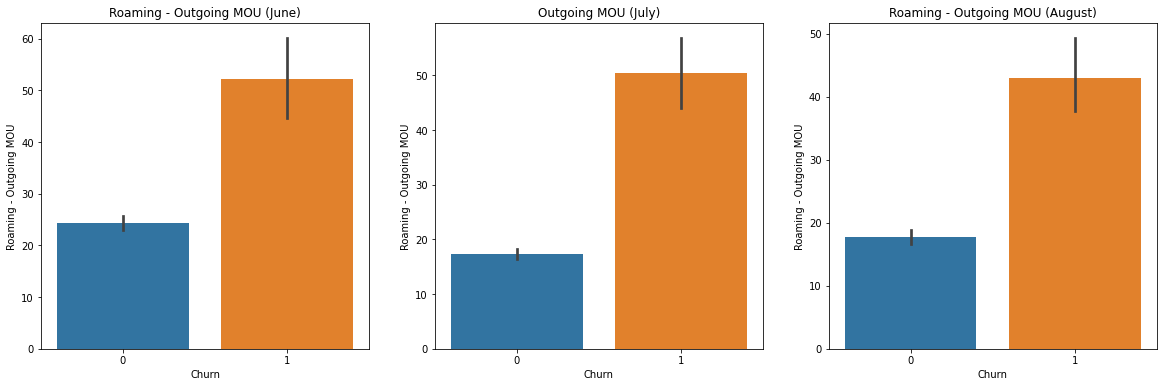

In [87]:
# # Roaming Minutes of usage (voice calls) - Outgoing calls

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Roaming - Outgoing MOU (June)")
sns.barplot(x = 'churn', y = 'roam_og_mou_6', data = high_val_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Outgoing MOU (July)")
sns.barplot(x = 'churn', y = 'roam_og_mou_7', data = high_val_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Roaming - Outgoing MOU (August)")
sns.barplot(x = 'churn', y = 'roam_og_mou_8', data = high_val_final)
plt.ylabel('Roaming - Outgoing MOU')
plt.xlabel('Churn')
plt.show()

### <a id='1'>Insights:</a>

1. There is no much difference between good phase and action phase for churned customers w.r.t. roaming MOU

In [88]:
# Overall Incoming and Outgoing MOU
mou = high_val_final.columns[high_val_final.columns.str.contains('_mou')]
mou

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

### <a id='1'>Insights:</a>

 - According to the data dictionary/ buisness understanding below are the explanation for above parameters
1. T2T - Operator T to T, i.e. within same operator (mobile to mobile)
2. T2M - Operator T to other operator mobile
3. T2O - Operator T to other operator fixed line
4. T2F - Operator T to fixed lines of T
5. LOC - Local calls - within same telecom circle
6. STD - STD calls - outside the calling circle
7. IC - Incoming calls
8. OG - Outgoing calls
 - Also the total MOU is equal to the sum of individual MOU (t2t,t2f,t2m & t2O)
 - This can be verified for a June month data to confirm

In [89]:
# Quick check on incoming usage for june - Local
print("Incoming")
high_val_final.loc_ic_mou_6.sum()
high_val_final.loc_ic_t2t_mou_6.sum()+ high_val_final.loc_ic_t2m_mou_6.sum()+high_val_final.loc_ic_t2f_mou_6.sum()
# Quick check on outgoing usage for june - Local
print("Outgoing")
high_val_final.loc_og_mou_6.sum()
high_val_final.loc_og_t2t_mou_6.sum()+ high_val_final.loc_og_t2m_mou_6.sum()+high_val_final.loc_og_t2f_mou_6.sum()

Incoming
Outgoing


7396354.720000001

In [90]:
# Quick check on incoming usage for june - STD
print("Incoming")
high_val_final.std_ic_mou_6.sum()
high_val_final.std_ic_t2t_mou_6.sum()+ high_val_final.std_ic_t2m_mou_6.sum()+high_val_final.std_ic_t2f_mou_6.sum()
# Quick check on outgoing usage for june - STD
print("Outgoing")
high_val_final.std_og_mou_6.sum()
high_val_final.std_og_t2t_mou_6.sum()+ high_val_final.std_og_t2m_mou_6.sum()+high_val_final.std_og_t2f_mou_6.sum()

Incoming
Outgoing


10176895.91

In [91]:
# Quick check on incoming usage for june - ISD
print("Incoming")
high_val_final.total_ic_mou_6.sum()
high_val_final.loc_ic_mou_6.sum()+high_val_final.std_ic_mou_6.sum()+high_val_final.isd_ic_mou_6.sum()+high_val_final.spl_ic_mou_6.sum()+high_val_final.ic_others_6.sum()
# # Quick check on outgoing usage for june - ISD
print("Outgoing")
high_val_final.total_og_mou_6.sum()
high_val_final.loc_og_mou_6.sum()+ high_val_final.std_og_mou_6.sum()+high_val_final.isd_og_mou_6.sum()+high_val_final.spl_og_mou_6.sum()+high_val_final.og_others_6.sum()

Incoming
Outgoing


17799640.840000004

### <a id='1'>Insights:</a>

1. As above results look similar we can use the overall / total and ignore the individual components
2. Also new features can be derived from it

In [92]:
# Creating new features for incoming and outgoing MOU for good phase
# Local incoming
high_val_final["loc_ic_t2f_mou_goodphase"] = (high_val_final.loc_ic_t2f_mou_6 + high_val_final.loc_ic_t2f_mou_7)/2
high_val_final["loc_ic_t2m_mou_goodphase"] = (high_val_final.loc_ic_t2m_mou_6 + high_val_final.loc_ic_t2m_mou_7)/2
high_val_final["loc_ic_t2t_mou_goodphase"] = (high_val_final.loc_ic_t2t_mou_6 + high_val_final.loc_ic_t2t_mou_7)/2

In [93]:
# STD incoming
high_val_final["std_ic_t2f_mou_goodphase"] = (high_val_final.std_ic_t2f_mou_6 + high_val_final.std_ic_t2f_mou_7)/2
high_val_final["std_ic_t2m_mou_goodphase"] = (high_val_final.std_ic_t2m_mou_6 + high_val_final.std_ic_t2m_mou_7)/2
high_val_final["std_ic_t2o_mou_goodphase"] = (high_val_final.std_ic_t2o_mou_6 + high_val_final.std_ic_t2o_mou_7)/2
high_val_final["std_ic_t2t_mou_goodphase"] = (high_val_final.std_ic_t2t_mou_6 + high_val_final.std_ic_t2t_mou_7)/2

# Other incoming
high_val_final["isd_ic_mou_goodphase"] = (high_val_final.isd_ic_mou_6 + high_val_final.isd_ic_mou_7)/2
high_val_final["spl_ic_mou_goodphase"] = (high_val_final.spl_ic_mou_6 + high_val_final.spl_ic_mou_7)/2
high_val_final["ic_others_goodphase"] = (high_val_final.ic_others_6 + high_val_final.ic_others_7)/2
high_val_final["roam_ic_mou_goodphase"] = (high_val_final.roam_ic_mou_6 + high_val_final.roam_ic_mou_7)/2

In [94]:
# Local outgoing
high_val_final["loc_og_t2f_mou_goodphase"] = (high_val_final.loc_og_t2f_mou_6 + high_val_final.loc_og_t2f_mou_7)/2
high_val_final["loc_og_t2m_mou_goodphase"] = (high_val_final.loc_og_t2m_mou_6 + high_val_final.loc_og_t2m_mou_7)/2
high_val_final["loc_og_t2t_mou_goodphase"] = (high_val_final.loc_og_t2t_mou_6 + high_val_final.loc_og_t2t_mou_7)/2

In [95]:
# STD Outgoing
high_val_final["std_og_t2f_mou_goodphase"] = (high_val_final.std_og_t2f_mou_6 + high_val_final.std_og_t2f_mou_7)/2
high_val_final["std_og_t2m_mou_goodphase"] = (high_val_final.std_og_t2m_mou_6 + high_val_final.std_og_t2m_mou_7)/2
high_val_final["std_og_t2t_mou_goodphase"] = (high_val_final.std_og_t2t_mou_6 + high_val_final.std_og_t2t_mou_7)/2
# Other Outgoing
high_val_final["isd_og_mou_goodphase"] = (high_val_final.isd_og_mou_6 + high_val_final.isd_og_mou_7)/2
high_val_final["spl_og_mou_goodphase"] = (high_val_final.spl_og_mou_6 + high_val_final.spl_og_mou_7)/2
high_val_final["og_others_goodphase"] = (high_val_final.og_others_6 + high_val_final.og_others_7)/2
high_val_final["roam_og_mou_goodphase"] = (high_val_final.roam_og_mou_6 + high_val_final.roam_og_mou_7)/2

In [96]:
# Dropping redundant columns
# Incoming
high_val_final.drop(['loc_ic_t2f_mou_6','loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','std_ic_t2f_mou_6',
                           'std_ic_t2m_mou_6','std_ic_t2o_mou_6','std_ic_t2t_mou_6','isd_ic_mou_6', 'spl_ic_mou_6',
                           'ic_others_6', 'roam_ic_mou_6','loc_ic_t2f_mou_7','loc_ic_t2m_mou_7','loc_ic_t2t_mou_7',
                           'std_ic_t2f_mou_7','std_ic_t2m_mou_7', 'std_ic_t2o_mou_7','std_ic_t2t_mou_7', 
                           'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7','roam_ic_mou_7'], inplace=True, axis=1)

In [97]:
# Outgoing
high_val_final.drop(['loc_og_t2f_mou_6','loc_og_t2m_mou_6', 'loc_og_t2t_mou_6',
                           'std_og_t2f_mou_6','std_og_t2m_mou_6', 'std_og_t2t_mou_6', 'isd_og_mou_6',
                           'spl_og_mou_6', 'og_others_6','roam_og_mou_6', 'loc_og_t2f_mou_7','loc_og_t2m_mou_7',
                           'loc_og_t2t_mou_7','std_og_t2f_mou_7','std_og_t2m_mou_7','std_og_t2t_mou_7',
                           'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'roam_og_mou_7'], inplace=True, axis=1)

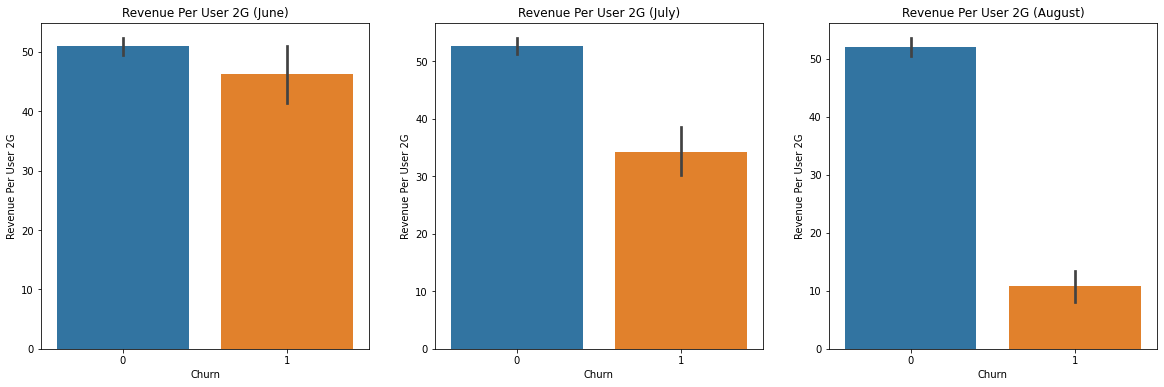

In [98]:
# RPU - Revenue Per User 2G

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Revenue Per User 2G (June)")
sns.barplot(x = 'churn', y = 'arpu_2g_6', data = high_val_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Revenue Per User 2G (July)")
sns.barplot(x = 'churn', y = 'arpu_2g_7', data = high_val_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Revenue Per User 2G (August)")
sns.barplot(x = 'churn', y = 'arpu_2g_8', data = high_val_final)
plt.ylabel('Revenue Per User 2G')
plt.xlabel('Churn')
plt.show()

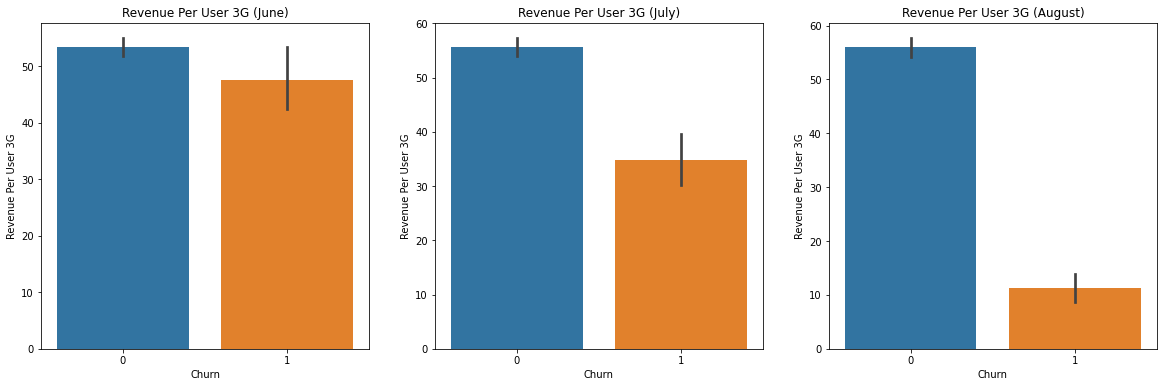

In [99]:
# RPU - Revenue Per User 3G

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
# June
plt.title("Revenue Per User 3G (June)")
sns.barplot(x = 'churn', y = 'arpu_3g_6', data = high_val_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')

plt.subplot(1,3,2)
# July
plt.title("Revenue Per User 3G (July)")
sns.barplot(x = 'churn', y = 'arpu_3g_7', data = high_val_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')

plt.subplot(1,3,3)
# August
plt.title("Revenue Per User 3G (August)")
sns.barplot(x = 'churn', y = 'arpu_3g_8', data = high_val_final)
plt.ylabel('Revenue Per User 3G')
plt.xlabel('Churn')
plt.show()

In [100]:
high_val_final.shape

(28788, 140)

In [101]:
high_val_final.to_csv("high_value_final.csv")

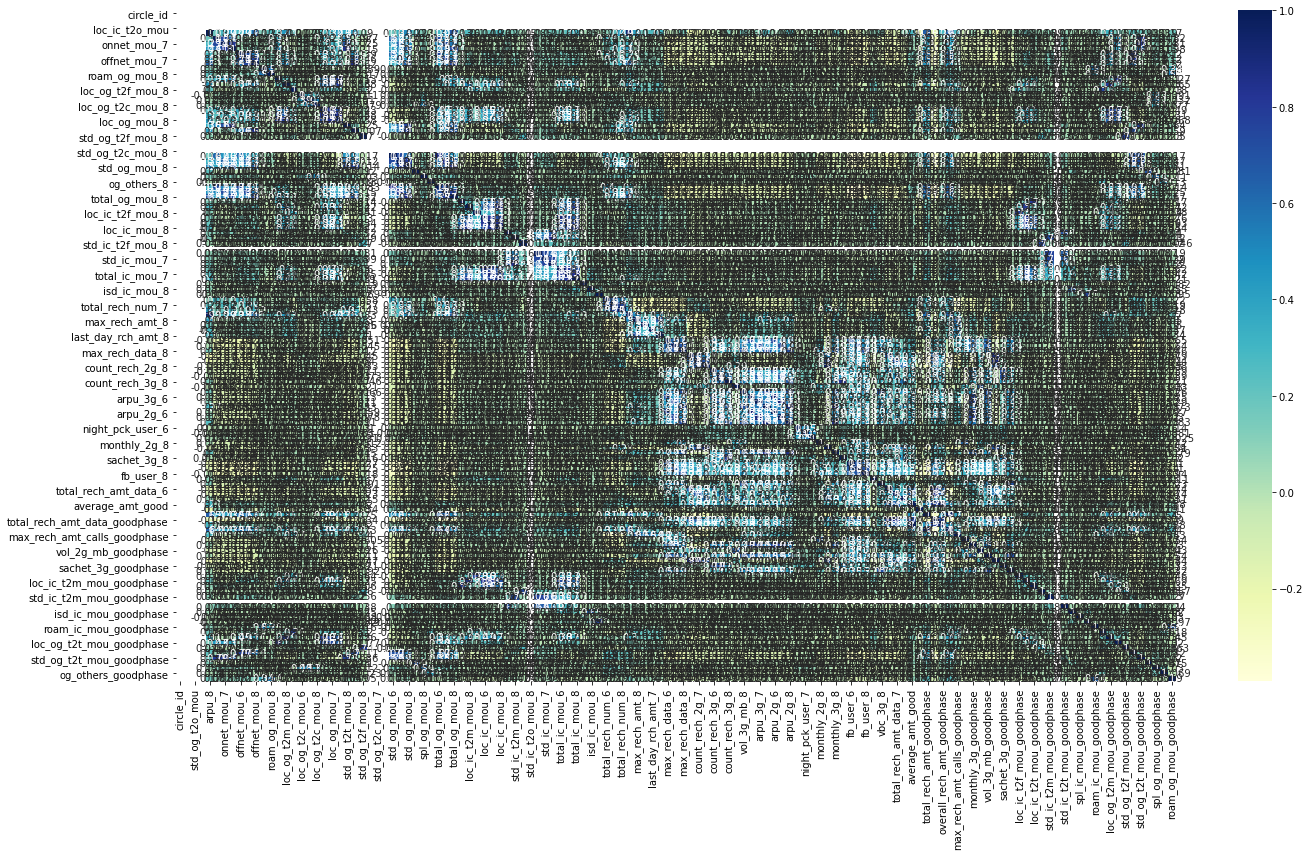

In [102]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,12))
cor = high_val_final.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

In [103]:
# Dropping date columns & circle id as it will nit be needed for modelling and also we have other new features

high_val_final.drop(['last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8','date_of_last_rech_6',
                    'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
                    'date_of_last_rech_data_8'], axis=1, inplace=True)
high_val_final.drop('circle_id', axis = 1, inplace = True)
high_val_final.shape

(28788, 130)

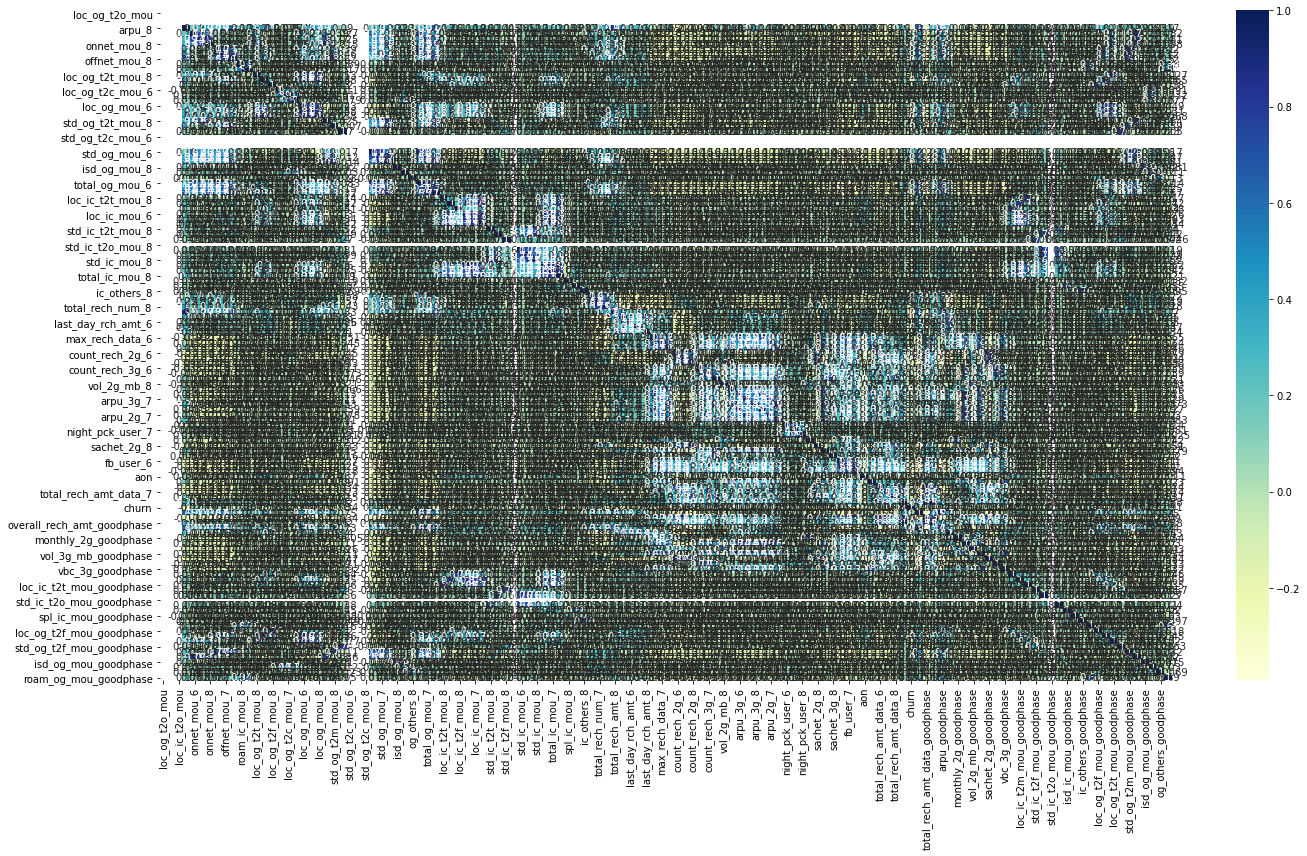

In [104]:
# Correlation Matrix / Heat map
plt.figure(figsize=(20,12))
cor = high_val_final.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

### <a id='1'>4. Modelling</a>

Below steps will be followed to build a model tp predict the customer who will churn
   1. Train Test Split
   2. Handling Imbalanced dataset - Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution.
     - Reference 1: https://towardsdatascience.com/comparing-different-classification-machine-learning-models-for-an-imbalanced-dataset-fdae1af3677f
     - Reference 2: https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data
   3. Scaling using StandardScaler
   4. Dimentionality reduction using PCA
   5. Train a variety of models - Logistic and Random Forest
   6. Hyper parameter tuning
   7. Evaluate the models using appropriate evaluation metrics - Accuracy, Precision and Recall
   8. Model selection based on metrics

In [105]:
telecom_model = high_val_final.copy()

### <a id='1'>4.1. Train Test Split</a>

In [106]:
# Response variable
y = telecom_model['churn']
# Feature variable
x = telecom_model.drop('churn', axis=1)

In [107]:
# Split the data between train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = RANDOM_STATE)

### <a id='1'>4.2. Handling Imbalanced dataset - Synthetic Minority Over-sampling Technique</a>

In [108]:
# This is performed only on train data set as balancing is needed whie training the model
#check churn ratio before balacing using smote
print('Churn % before balancing')
(100 * y_train.value_counts()/ y_train.shape[0]).round(2)

Churn % before balancing


0    92.14
1     7.86
Name: churn, dtype: float64

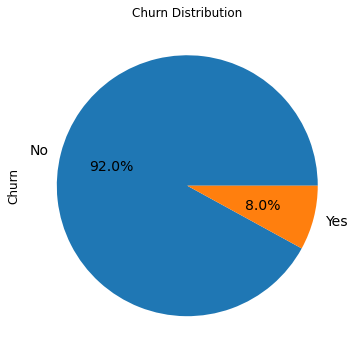

In [109]:
#Churn Distribution
pie_chart = telecom_model['churn'].value_counts()*100.0 /len(telecom_model)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [110]:
# Balancing
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [111]:
#check churn ratio after balacing using smote
print('Churn % after balancing')
print((y_train != 0).sum()/(y_train == 0).sum())

Churn % after balancing
1.0


### <a id='1'>Insights:</a>

1. SMOTE has balanced out the data well

### <a id='1'>4.3. Scaling using StandardScaler</a>

In [112]:
# Scale variables
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### <a id='1'>4.4. Dimentionality reduction using PCA (Principle Component Analysis)</a>**

PCA is a linear dimensionality reduction technique. It helps in getting the most important variables from a larger set of variables. It also handles the problem of multi collinearity

In [113]:
#Perform PCA
pca = PCA(svd_solver = 'randomized', random_state = RANDOM_STATE)
pca.fit(x_train)

PCA(random_state=42, svd_solver='randomized')

In [114]:
pca.components_

array([[ 9.93439130e-17,  3.33066907e-16, -1.38777878e-17, ...,
        -4.40127556e-02, -2.21162423e-02, -3.00893202e-02],
       [ 1.01388040e-17,  0.00000000e+00, -5.55111512e-16, ...,
         2.23688189e-02, -6.29391978e-04, -3.79430586e-04],
       [ 1.15192390e-18, -1.24032729e-16,  1.11022302e-16, ...,
        -5.04492075e-02, -3.07105348e-03, -4.99116843e-02],
       ...,
       [-0.00000000e+00, -5.14345476e-01,  3.05387059e-01, ...,
         8.61116733e-15,  1.24379673e-15,  6.93889390e-18],
       [-0.00000000e+00, -1.03441052e-05,  3.89836495e-06, ...,
         7.46977180e-19,  1.01749833e-19, -1.03761536e-20],
       [ 1.00000000e+00, -1.19219980e-24, -3.71795564e-24, ...,
         5.47059408e-14,  7.23214122e-15, -1.31490788e-16]])

In [115]:
# Checking the first 20 principal components
pca.explained_variance_ratio_[0:20]

array([0.11810899, 0.10431561, 0.06247336, 0.05354194, 0.0384051 ,
       0.03597728, 0.03087368, 0.02741846, 0.0238776 , 0.02313838,
       0.02153099, 0.02038574, 0.01981037, 0.01774872, 0.01694357,
       0.01545146, 0.01514833, 0.0140434 , 0.0139468 , 0.01282909])

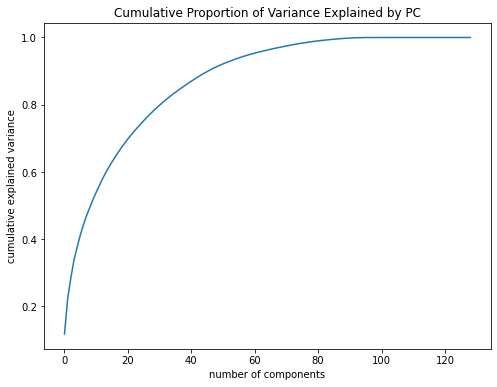

In [116]:
#Making the screeplot

fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Proportion of Variance Explained by PC')
plt.show()


In [117]:
pca_explain_variance_x = {'PC-10':round(pca.explained_variance_ratio_[0:10].sum(),2), 
                               'PC-20':round(pca.explained_variance_ratio_[0:20].sum(),2),
                               'PC-30':round(pca.explained_variance_ratio_[0:30].sum(),2), 
                               'PC-40':round(pca.explained_variance_ratio_[0:40].sum(),2),
                               'PC-50':round(pca.explained_variance_ratio_[0:50].sum(),2),
                               'PC-60':round(pca.explained_variance_ratio_[0:60].sum(),2),
                               'PC-70':round(pca.explained_variance_ratio_[0:70].sum(),2),
                               'PC-80':round(pca.explained_variance_ratio_[0:80].sum(),2),
                               'PC-90':round(pca.explained_variance_ratio_[0:90].sum(),2)}
pca_explain_variance_x

{'PC-10': 0.52,
 'PC-20': 0.69,
 'PC-30': 0.79,
 'PC-40': 0.86,
 'PC-50': 0.92,
 'PC-60': 0.95,
 'PC-70': 0.97,
 'PC-80': 0.99,
 'PC-90': 1.0}

### <a id='1'>Insights:</a>

1. First 10 principal components explains 52% of the variance while 92% by first 50 principal components
2. From scree plot it is clear that the cumulative variance explanation curve flattens after 50.

In [118]:
#Visualizing the principal components
col = list(x.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1],'Feature':col})
pca_df.head(10)

PC1           PC2         Feature
0  9.934391e-17  1.013880e-17  loc_og_t2o_mou
1  3.330669e-16  0.000000e+00  std_og_t2o_mou
2 -1.387779e-17 -5.551115e-16  loc_ic_t2o_mou
3 -3.400653e-02  2.042360e-01          arpu_8
4 -1.221724e-01  3.457354e-02     onnet_mou_6
5 -1.269370e-01  6.742256e-02     onnet_mou_7
6 -9.753136e-02  1.026189e-01     onnet_mou_8
7 -1.231146e-01  6.481067e-02    offnet_mou_6
8 -1.266711e-01  1.058605e-01    offnet_mou_7
9 -8.889646e-02  1.508300e-01    offnet_mou_8

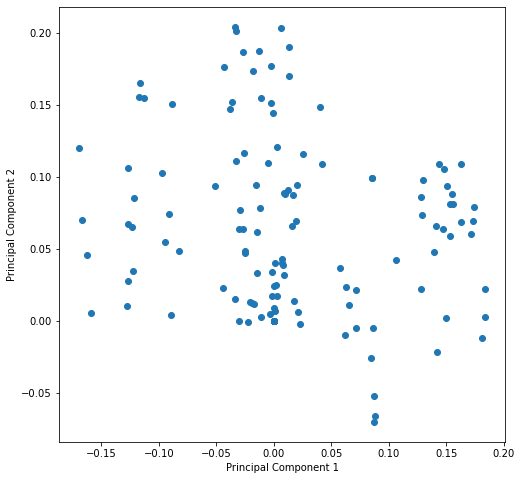

In [119]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [120]:
# Fitting the PCA
pca_final = IncrementalPCA(n_components = 50)

In [121]:
df_train_pca = pca_final.fit_transform(x_train)

In [122]:
# Checking multicollinearity - if there is correlation between PC's
corrmat = np.round(np.corrcoef(df_train_pca.transpose()),2)

<AxesSubplot:>

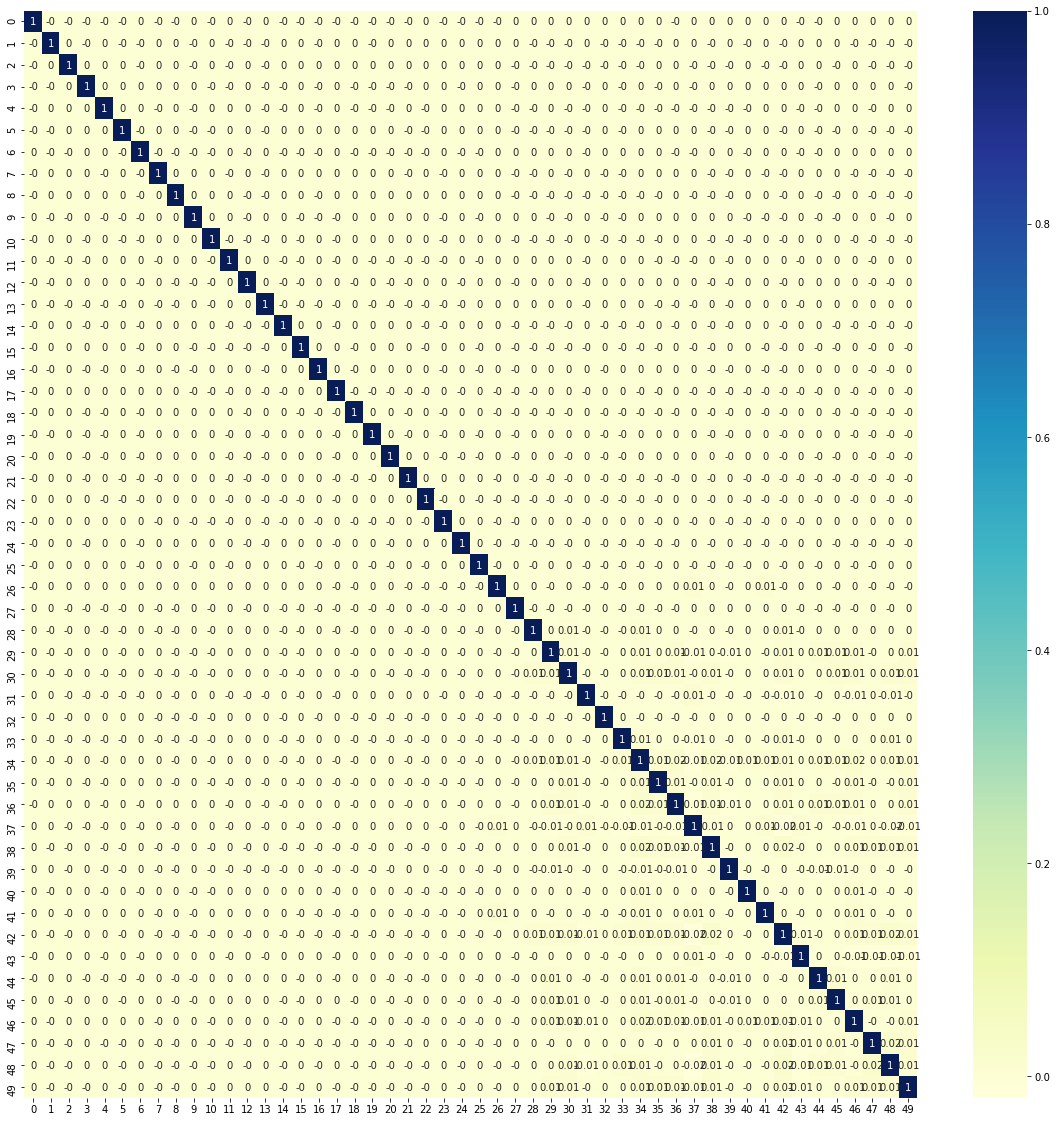

In [123]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(corrmat, annot= True, cmap="YlGnBu")


### <a id='1'>Insights:</a>

1. From the heat map it is clear that there is no sigficant correlation between the principal components
2. Hence there is no multi collinearity problem here for PC's

In [124]:
# Applying the PC's on test data
df_test_pca = pca_final.transform(x_test)

### <a id='1'>4.5. Train a variety of models</a>

1. There are numerious ML models available in industry which are robust
2. Here we will go with **Logistic Regression** and **Random Forest**. The reason for chossing this is based on the problem statemtement and business need mentioned
  - Identify important variables that are strong predictors of churn
  - Predict whether a high-value customer will churn or not, in near future

### ***Logistic Regression***

In [125]:
# Logistic Regression
LR_with_PCA = LogisticRegression(random_state=RANDOM_STATE)
C=list(np.power(10.0, np.arange(-4, 4)))
n_folds = 5
gs = GridSearchCV(LR_with_PCA,
    param_grid=[{'C': C, 'penalty': ['l1', 'l2']}],
    cv= n_folds,                 
    scoring='accuracy',
    n_jobs= 1,
    verbose=1,
    refit=True,
    return_train_score = True)

In [126]:
# Fittng the Model
LR_with_PCA_model = gs.fit(df_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [127]:
# cv results
cv_results = pd.DataFrame(LR_with_PCA_model.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [128]:
# Getting the important columns out
cv_results_important = cv_results[['param_C', 'param_penalty',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important.sort_values('rank_test_score').head()

param_C param_penalty  mean_train_score  std_train_score  mean_test_score  \
5     0.01            l2          0.837837         0.001768         0.837103   
9      1.0            l2          0.837743         0.001885         0.836969   
11    10.0            l2          0.837703         0.001899         0.836915   
13   100.0            l2          0.837703         0.001899         0.836888   
15  1000.0            l2          0.837696         0.001910         0.836888   

    std_test_score  rank_test_score  
5         0.006281                1  
9         0.006173                2  
11        0.006157                3  
13        0.006183                4  
15        0.006183                4

### <a id='1'>Insights:</a>

1. Logistic regression model is simple and easy to execute
2. 'C' parameter is inverse of regularization strength. It does well for both l1 and l2 regularisations
3. Results suggests all features have importance as PCA was already performed


In [129]:
cv_results_l1 = cv_results[cv_results_important['param_penalty'] == 'l1']
cv_results_l2 = cv_results[cv_results_important['param_penalty'] == 'l2']

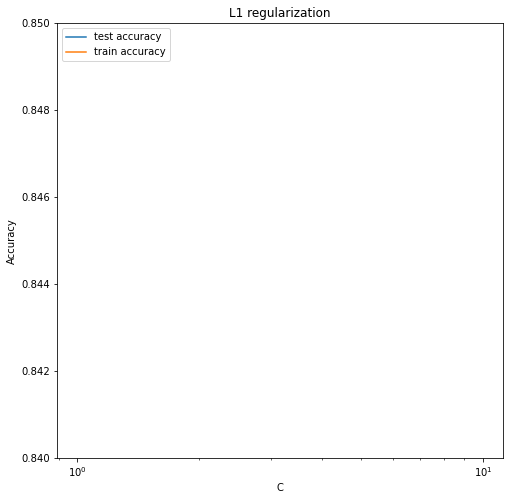

In [130]:
cv_results_l1['param_C'] = cv_results_l1['param_C'].astype('int')

plt.figure(figsize=(8,8))
l1 = cv_results_l1
plt.plot(l1["param_C"], l1["mean_test_score"])
plt.plot(l1["param_C"], l1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("L1 regularization")
plt.ylim([0.84, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

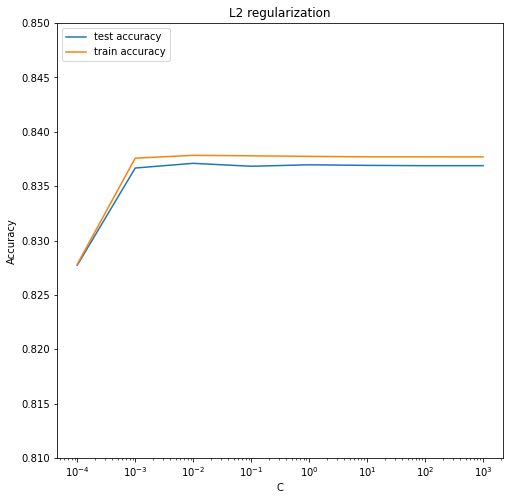

In [131]:
plt.figure(figsize=(8,8))
l2 = cv_results_l2

plt.plot(l2["param_C"], l2["mean_test_score"])
plt.plot(l2["param_C"], l2["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("L2 regularization")
plt.ylim([0.81, 0.85])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

### <a id='1'>Insights:</a>

1. There is no impact of model performance by L1 Regularization
2. There is significant impact on performance by L2 Regularisation
3. Considering the model accuracy for test data set, the accuracy is high at c=1
4. L2 regularisation can be used with c =1

In [132]:
## Optimal scores
opt_score = LR_with_PCA_model.best_score_
opt_score.round(4)

0.8371

In [133]:
# Optimal params
opt_hyperparams = LR_with_PCA_model.best_params_
opt_hyperparams

{'C': 0.01, 'penalty': 'l2'}

In [134]:
# Fitting the model with best hyper parameters
# specifying optimal hyperparameters

# Optimal Model
LR = LogisticRegression(penalty = 'l2', C = 1.0, random_state=RANDOM_STATE)
LR_PCA_final = LR.fit(df_train_pca, y_train)

In [135]:
# Train and Test Accuracy
predict_prob_train = LR_PCA_final.predict_proba(df_train_pca)[:,1]
predict_prob_test = LR_PCA_final.predict_proba(df_test_pca)[:,1]

In [136]:
print("Train Data Accurancy = ",round(100*metrics.roc_auc_score(y_train, predict_prob_train),4))
print("Test Data Accurancy = ",round(100*metrics.roc_auc_score(y_test, predict_prob_test),4))

Train Data Accurancy =  91.0919
Test Data Accurancy =  89.6711


In [137]:
# Creating data frame with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_prob':predict_prob_train})

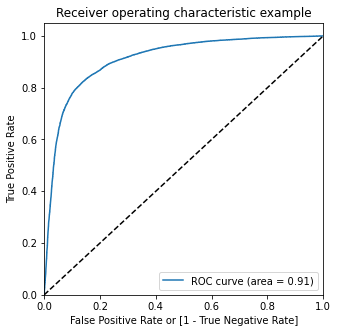

In [138]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

### <a id='1'>Insights:</a>

1. The train and test data accuracy score is bit different
2. At P = 0.6 the model is stabilizing and hence the cut off value as 0.6

In [139]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range (10)]
for i in numbers: 
    y_train_pred_final[i] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Churn  Churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      1    0.874295    1    1    1    1    1    1    1    1    1    0
1      0    0.241201    1    1    1    0    0    0    0    0    0    0
2      0    0.057807    1    0    0    0    0    0    0    0    0    0
3      0    0.933437    1    1    1    1    1    1    1    1    1    1
4      0    0.002539    1    0    0    0    0    0    0    0    0    0

In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.500000     1.000000     0.000000
0.1   0.1  0.708704     0.975817     0.441590
0.2   0.2  0.766764     0.955782     0.577745
0.3   0.3  0.803065     0.927129     0.679000
0.4   0.4  0.827086     0.896752     0.757419
0.5   0.5  0.837642     0.855119     0.820165
0.6   0.6  0.841358     0.808477     0.874239
0.7   0.7  0.831852     0.750848     0.912856
0.8   0.8  0.793020     0.638014     0.948026
0.9   0.9  0.631874     0.279690     0.984058


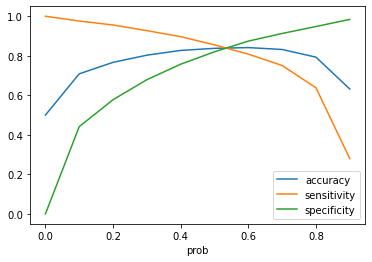

In [141]:
# Curve
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

### <a id='1'>Insights:</a>

1. From ROC curve the optimal probability range is between 0.5 to 0.65
2. Accuracy, specificity and sensitivity curve converge at o.55
3. Hence we can take p = 0.55 for further predictions

In [142]:
y_train_pred_final['Final_Predict'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x>=0.55 else 0)

In [143]:
# Final DataFrame
finfr = list(y_train_pred_final.columns)
y_train_pred_final.drop(finfr[2:-1],axis = 1, inplace = True)
y_train_pred_final.head()

Churn  Churn_prob  Final_Predict
0      1    0.874295              1
1      0    0.241201              0
2      0    0.057807              0
3      0    0.933437              1
4      0    0.002539              0

In [144]:
#### Metrics
Precision_sklearn = round(100*precision_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),4)
Recall_sklearn = round(100*recall_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict),4)
Accuracy_sklearn = accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)

print('Accuracy_sklearn',Precision_sklearn)
print('Precision_sklearn',Precision_sklearn)
print('Recall_sklearn',Recall_sklearn)

Accuracy_sklearn 84.6856
Precision_sklearn 84.6856
Recall_sklearn 83.4222


In [145]:
conf_mat_2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Final_Predict)
conf_mat_2
TP = conf_mat_2[1,1] # true positive 
TN = conf_mat_2[0,0] # true negatives
FP = conf_mat_2[0,1] # false positives
FN = conf_mat_2[1,0] # false negatives

In [146]:
# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_Predict)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)

# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [147]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 84.2, 'Precision': 85, 'Recall': 83.4}

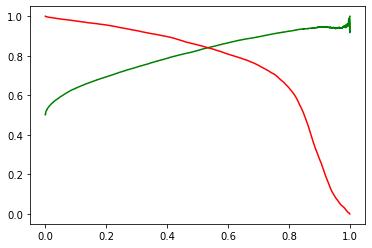

In [148]:
# Precision recall curve

p,r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### <a id='1'>Insights:</a>

1. Recall and precision curve converge at 0.55
2. Since the goal is to predict as many true churns possible we can go with Recall values
3. This ensures there is lower false negatives and higher true positives

In [149]:
# Model performance on test data
df_test_pca[0:1]

array([[-2.18200584,  0.6166103 , -1.94737167, -0.68844939, -2.51151604,
        -0.882012  ,  1.22904694, -1.35592032, -0.54726919,  1.00247215,
         2.65576997,  0.10844366,  0.91051282,  0.58609797,  0.10160039,
         0.01560251,  0.25288439,  0.08765523,  0.61821779,  0.86070675,
         0.45191402, -0.04911808, -0.25851413, -0.03786657,  0.23678224,
        -0.0373088 ,  0.15237576,  0.16472741, -0.42029803,  0.25585455,
         0.11630568,  0.1074297 , -0.48283055,  0.40454671,  0.43063729,
         0.18947506, -0.55520423, -0.66289132, -1.01277761,  0.82061878,
         0.04839693,  0.48536705, -0.01892507, -0.27631646,  0.26223967,
         0.14783356, -0.33463321, -0.38245528,  0.23974408, -0.18738353]])

In [150]:
# Test Result Dataframe
# Predict the y test values
y_test_pred = LR_PCA_final.predict(df_test_pca)

# Convert y_pred to a data frame which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# View the dataframe
y_pred_1.head()

0
0  0
1  0
2  0
3  1
4  0

In [151]:
# Convert y_test to a Dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace = True)

In [152]:
# Append y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final.head()

mobile_number  churn  0
0     7000414430      0  0
1     7000189484      0  0
2     7000710112      0  0
3     7000843290      0  1
4     7001318860      0  0

In [153]:
# Rename the column
y_pred_final = y_pred_final.rename(columns={0 :'Churn_Predict'})
y_pred_final.head()

mobile_number  churn  Churn_Predict
0     7000414430      0              0
1     7000189484      0              0
2     7000710112      0              0
3     7000843290      0              1
4     7001318860      0              0

In [154]:
y_pred_final['Final_pred'] = y_pred_final.Churn_Predict.map(lambda x: 1 if x >= 0.55 else 0 )
y_pred_final.head()

mobile_number  churn  Churn_Predict  Final_pred
0     7000414430      0              0           0
1     7000189484      0              0           0
2     7000710112      0              0           0
3     7000843290      0              1           1
4     7001318860      0              0           0

In [155]:
# Confusion Matrix - Test
conf_mat_3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Churn_Predict)
conf_mat_3

array([[6513, 1411],
       [ 119,  594]])

In [156]:
# Confusion Matrix - Test
TP = conf_mat_3[1,1] # true positive 
TN = conf_mat_3[0,0] # true negatives
FP = conf_mat_3[0,1] # false positives
FN = conf_mat_3[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_pred_final.churn, y_pred_final.Final_pred)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [157]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}
print('Test Metrics:', Metrics_test)
print('Train Metrics', Metrics_train)

Test Metrics: {'Accuracy': 82.3, 'Precision': 30, 'Recall': 83.3}
Train Metrics {'Accuracy': 84.2, 'Precision': 85, 'Recall': 83.4}


### <a id='1'>Insights:</a>

1. Accuracy seem to be fine but precision and recall values seem okay
2. Logistic regression model results are not okay but need to check the results for Random forest as well

### ***Random Forest***

In [158]:
# Creating the parameter grid
param_grid = {
    'max_depth': [1,7,15],
    'min_samples_leaf': range(15, 50, 5),
    'min_samples_split': range(20, 40, 5),
    'n_estimators': [15], 
    'max_features': [10, 20, 5]
}

rf = RandomForestClassifier(random_state=RANDOM_STATE)
# run the grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, 
                          cv= 3, n_jobs=-1, 
                          verbose=1,
                          return_train_score = True)

In [159]:
# Fitting the model to our data
rf_model = grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


In [160]:
# cv results
cv_results_rf = pd.DataFrame(rf_model.cv_results_)
cv_results_rf.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [161]:
# Getting the important columns out
cv_results_important_rf = cv_results_rf[['param_max_depth', 'param_max_features','param_min_samples_leaf',
                                   'param_min_samples_split','param_n_estimators',
                                   'mean_train_score','std_train_score',
                                   'mean_test_score','std_test_score',
                                   'rank_test_score']]
cv_results_important_rf.sort_values('rank_test_score').head(5)

param_max_depth param_max_features param_min_samples_leaf  \
170              15                 10                     15   
168              15                 10                     15   
169              15                 10                     15   
198              15                 20                     15   
197              15                 20                     15   

    param_min_samples_split param_n_estimators  mean_train_score  \
170                      30                 15          0.933619   
168                      20                 15          0.933619   
169                      25                 15          0.933619   
198                      30                 15          0.937443   
197                      25                 15          0.937443   

     std_train_score  mean_test_score  std_test_score  rank_test_score  
170         0.001346         0.899391        0.003430                1  
168         0.001346         0.899391        0.003430                1  
169         0.001346         0.899391        0.003430                1  
198         0.001468         0.899095        0.004405                4  
197         0.001468         0.899095        0.004405                4

In [162]:
cv_results_important_rf.to_csv("cv_results_rf.csv")

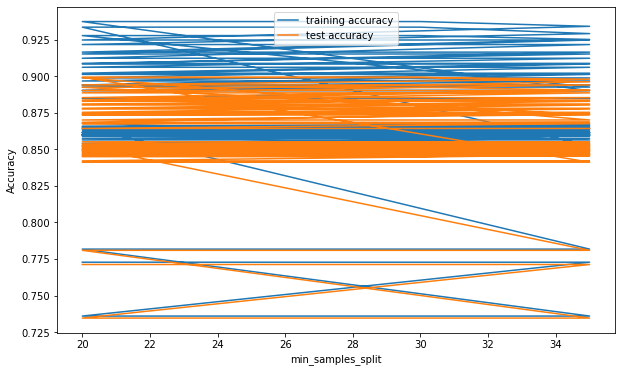

In [163]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(10,6))

plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_split"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()

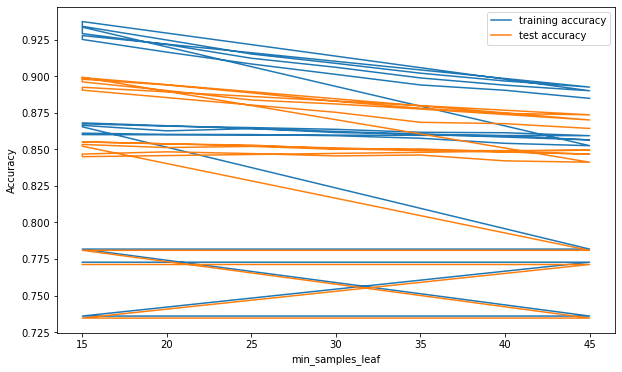

In [164]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_min_samples_leaf"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()

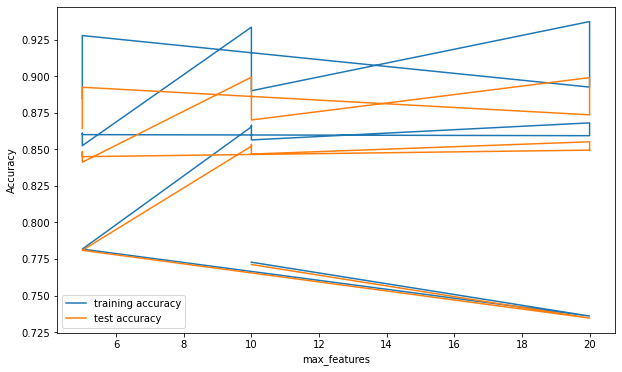

In [165]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_features"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()


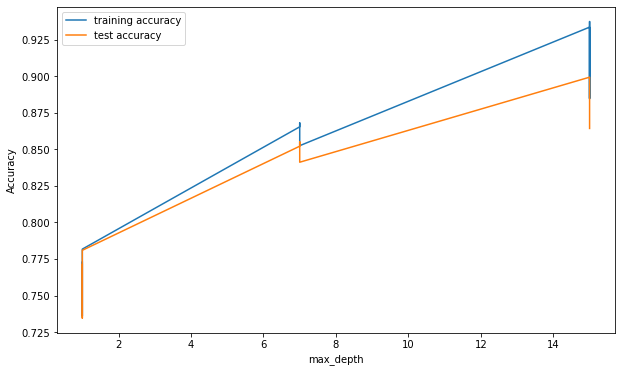

In [166]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_max_depth"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()

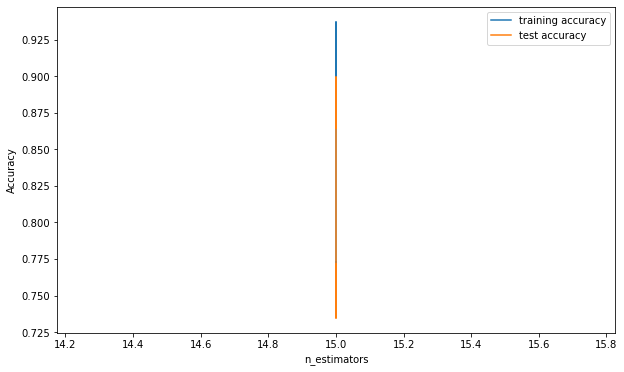

In [167]:
plt.figure(figsize=(10,6))
plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_train_score"], 
         label="training accuracy")
plt.plot(cv_results_important_rf["param_n_estimators"], 
         cv_results_important_rf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()

### <a id='1'>Insights:</a>

1. As max depth increases the score also increases
2. Other hyper parameters does not affect the scores significantly and cannot come to a final conclusion

In [168]:
# optimal accuracy score and hyperparameters
opt_score = rf_model.best_score_
opt_hyperparams = rf_model.best_params_

print("Optimal Test Score {0} corresponding to hyperparameters {1}".format(opt_score, opt_hyperparams))

Optimal Test Score 0.8993913933322562 corresponding to hyperparameters {'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 15}


In [169]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=15,
                             min_samples_leaf=15, 
                             min_samples_split=20,
                             max_features=20,
                             n_estimators=15)

In [170]:
# fitting the data
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(max_depth=15, max_features=20, min_samples_leaf=15,
                       min_samples_split=20, n_estimators=15)

In [171]:
# Predictng the results on x_train
predict_train = rfc.predict(df_train_pca)

# Predicting the results on x_test
predict_test = rfc.predict(df_test_pca)

In [172]:
# Checking results for train data
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     18567
           1       0.93      0.96      0.94     18567

    accuracy                           0.94     37134
   macro avg       0.94      0.94      0.94     37134
weighted avg       0.94      0.94      0.94     37134



In [173]:
# Checking results for test data
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7924
           1       0.41      0.70      0.52       713

    accuracy                           0.89      8637
   macro avg       0.69      0.80      0.73      8637
weighted avg       0.92      0.89      0.90      8637



### <a id='1'>Insights:</a>

1. Train data accuracy, precision and recall values are exceptionally good
2. Test data accuracy precision and recall are decent though great

In [174]:
# Print confusion matrix
# Train Data
conf_mat_train = confusion_matrix(y_train,predict_train)
# Test Data
conf_mat_test = confusion_matrix(y_test,predict_test)

In [175]:
# Train Data
TP = conf_mat_train[1,1] # true positive 
TN = conf_mat_train[0,0] # true negatives
FP = conf_mat_train[0,1] # false positives
FN = conf_mat_train[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_train, predict_train)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [176]:
Metrics_train = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

Metrics_train

{'Accuracy': 94.4, 'Precision': 93, 'Recall': 95.7}

In [177]:
# Train Data
TP = conf_mat_test[1,1] # true positive 
TN = conf_mat_test[0,0] # true negatives
FP = conf_mat_test[0,1] # false positives
FN = conf_mat_test[1,0] # false negatives

# Check the accuracy of the model
Accuracy = round(100*(metrics.accuracy_score(y_test, predict_test)),1)

# Measure the sensitivity
Sensitivity = round(100*TP/float(TP+FN))

# Measure specificity
Specificity = round(100*TN/float(TN+FP),1)


# Precision
Precision = round(100*TP/float(TP+FP))

# Recall
Recall = round(100*TP/float(TP+FN),1)

In [178]:
Metrics_test = {'Accuracy': Accuracy, 
     'Precision': Precision,
     'Recall': Recall}

In [179]:
print(Metrics_train)
print(Metrics_test)

{'Accuracy': 94.4, 'Precision': 93, 'Recall': 95.7}
{'Accuracy': 89.2, 'Precision': 41, 'Recall': 69.8}


### <a id='1'>Conclusion:</a>

1. Comparing the results for logistics regression and random forest we can go with logistic regresion with PCA as the recall scores are better
2. Recall helps to increase the chance of true positives and lower fasle negatives

### <a id='1'>Find the best predictor</a>

In [180]:
# Response variable
y_2 = telecom_model['churn']
# Feature variable
x_2 = telecom_model.drop('churn', axis=1)

In [181]:
# Split the data between train and test
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, train_size = 0.7, test_size = 0.3, random_state = RANDOM_STATE)

In [182]:
# Balancing - smote
list_column_names = list(x_2.columns)
smote_2 = SMOTE()
x_train_2, y_train_2 = smote_2.fit_resample(x_train_2, y_train_2)

In [183]:
print('Churn % after smote')
print((y_train_2 != 0).sum()/(y_train_2 == 0).sum())

Churn % after smote
1.0


In [184]:
scaler = StandardScaler()
x_train_2 = scaler.fit_transform(x_train_2)
x_test_2 = scaler.transform(x_test_2)
df_train_2 = pd.DataFrame(x_train_2, columns = list_column_names)

### <a id='1'>Using RFE to find the features</a>

In [185]:
logreg = LogisticRegression()

logreg.fit(df_train_2,y_train_2)
rfe = RFE(logreg)

rfe = rfe.fit(df_train_2,y_train_2)

print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True  True  True False False
 False  True False False False False False  True  True False False False
 False False False False False  True  True False  True  True  True  True
  True  True  True  True  True  True  True False  True False False  True
 False  True  True  True  True False  True  True False  True False False
 False  True  True False False  True  True  True  True False  True  True
  True False False False False False False False False False False  True
  True  True  True  True False  True  True  True  True False  True False
 False False False  True False False False False False  True False False
 False  True  True False  True False  True False False  True  True  True
 False False False  True  True  True False False  True]
[66 65 64  1  1  1  1  1  1  1 32 50 33  1 57 40 53 45 51  1  1 49 48 14
 61 62 63 13 44  1  1 43  1  1  1  1  1  1  1  1  1  1  1 34  1 59 18  1
 15  1  1  1  1 16  1  1 46  1 52 38 12  1  1 24 21  1  1  1  1 56  

In [186]:
# Variables from RFE
col = df_train_2.columns[rfe.support_]

In [187]:
#1 Assessing the model with stats model
import statsmodels.api as sm
x_train_sm = sm.add_constant(df_train_2[col])
logm1 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37134
Model:                            GLM   Df Residuals:                    37069
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10131.
Date:                Mon, 28 Feb 2022   Deviance:                       20262.
Time:                        20:27:16   Pearson chi2:                 6.29e+05
No. Iterations:                    52                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1946.2142    9.4e+04      0.021      0.983   -1.82e+05    1.86e+05
arpu_8                       0.6873      0.060     11.519      0.000       0.570       0.804
onnet_mou_6                 -1.2572      0.752     -1.671      0.095      -2.732       0.217
onnet_mou_7                 -0.6346      0.700     -0.907      0.365      -2.006       0.737
onnet_mou_8                 -0.5298      0.108     -4.912      0.000      -0.741      -0.318
offnet_mou_6                -1.7840      0.828     -2.154      0.031      -3.407      -0.161
offnet_mou_7                -0.8326      0.796     -1.046      0.295      -2.392       0.727
offnet_mou_8                -0.7136      0.114     -6.285      0.000      -0.936      -0.491
loc_og_t2m_mou_8            -0.1092      0.090     -1.215      0.224      -0.285       0.067
loc_og_mou_7                 0.1660      0.080      2.072      0.038       0.009       0.323
loc_og_mou_8                -0.3160      0.376     -0.841      0.400      -1.052       0.420
std_og_mou_8                 0.1581      0.621      0.255      0.799      -1.059       1.375
isd_og_mou_8                -0.2249      0.042     -5.356      0.000      -0.307      -0.143
og_others_8                 -3.2656      1.865     -1.751      0.080      -6.921       0.389
total_og_mou_6               2.0691      1.134      1.824      0.068      -0.154       4.292
total_og_mou_7               1.2557      1.085      1.158      0.247      -0.871       3.382
total_og_mou_8              -0.0746      0.740     -0.101      0.920      -1.524       1.375
loc_ic_t2t_mou_8          8873.7125    420.124     21.122      0.000    8050.284    9697.141
loc_ic_t2m_mou_8          1.283e+04    607.592     21.121      0.000    1.16e+04     1.4e+04
loc_ic_t2f_mou_8          2397.7513    113.533     21.120      0.000    2175.232    2620.271
loc_ic_mou_6                -0.4436      0.219     -2.027      0.043      -0.872      -0.015
loc_ic_mou_7                 1.0341      0.218      4.744      0.000       0.607       1.461
loc_ic_mou_8             -1.833e+04    867.937    -21.123      0.000      -2e+04   -1.66e+04
std_ic_t2t_mou_8            -0.3722      0.069     -5.414      0.000      -0.507      -0.237
std_ic_t2f_mou_8            -0.1239      0.047     -2.653      0.008      -0.215      -0.032
std_ic_mou_7                 0.5142      0.146      3.525      0.000       0.228       0.800
total_ic_mou_6               1.0342      0.174      5.946      0.000       0.693       1.375
total_ic_mou_7              -0.3608      0.195     -1.848      0.065      -0.743       0.022
total_ic_mou_8              -0.8971      0.140     -6.419      0.000      -1.171      -0.623
spl_ic_mou_8                -0.1382      0.021     -6.623      0.000      -0.179      -0.097
ic_others_8   

In [188]:
x_train_sm.columns

Index(['const', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_6', 'fb_user_8', 'aon', 'vbc_3g_8', 'total_rech_amt_data_6',
       'total_rech_amt_data_8', 'arpu_goodphase', 

In [189]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features           VIF
22      loc_ic_mou_8  2.162696e+09
18  loc_ic_t2m_mou_8  1.059826e+09
17  loc_ic_t2t_mou_8  5.067187e+08
19  loc_ic_t2f_mou_8  3.700167e+07
14    total_og_mou_6  3.507070e+03
..               ...           ...
24  std_ic_t2f_mou_8  1.230000e+00
48               aon  1.200000e+00
29      spl_ic_mou_8  1.080000e+00
13       og_others_8  1.010000e+00
0              const  1.000000e+00

[65 rows x 2 columns]

In [190]:
# Dropping Columns 
#x_train_sm.drop(['offnet_mou_6'], axis = 1, inplace = True)

In [191]:
# 2
x_train_sm.columns

Index(['const', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_6', 'fb_user_8', 'aon', 'vbc_3g_8', 'total_rech_amt_data_6',
       'total_rech_amt_data_8', 'arpu_goodphase', 

In [192]:
#2 Assessing the model with stats model
import statsmodels.api as sm
logm2 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37134
Model:                            GLM   Df Residuals:                    37069
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10131.
Date:                Mon, 28 Feb 2022   Deviance:                       20262.
Time:                        20:27:31   Pearson chi2:                 6.29e+05
No. Iterations:                    52                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1946.2142    9.4e+04      0.021      0.983   -1.82e+05    1.86e+05
arpu_8                       0.6873      0.060     11.519      0.000       0.570       0.804
onnet_mou_6                 -1.2572      0.752     -1.671      0.095      -2.732       0.217
onnet_mou_7                 -0.6346      0.700     -0.907      0.365      -2.006       0.737
onnet_mou_8                 -0.5298      0.108     -4.912      0.000      -0.741      -0.318
offnet_mou_6                -1.7840      0.828     -2.154      0.031      -3.407      -0.161
offnet_mou_7                -0.8326      0.796     -1.046      0.295      -2.392       0.727
offnet_mou_8                -0.7136      0.114     -6.285      0.000      -0.936      -0.491
loc_og_t2m_mou_8            -0.1092      0.090     -1.215      0.224      -0.285       0.067
loc_og_mou_7                 0.1660      0.080      2.072      0.038       0.009       0.323
loc_og_mou_8                -0.3160      0.376     -0.841      0.400      -1.052       0.420
std_og_mou_8                 0.1581      0.621      0.255      0.799      -1.059       1.375
isd_og_mou_8                -0.2249      0.042     -5.356      0.000      -0.307      -0.143
og_others_8                 -3.2656      1.865     -1.751      0.080      -6.921       0.389
total_og_mou_6               2.0691      1.134      1.824      0.068      -0.154       4.292
total_og_mou_7               1.2557      1.085      1.158      0.247      -0.871       3.382
total_og_mou_8              -0.0746      0.740     -0.101      0.920      -1.524       1.375
loc_ic_t2t_mou_8          8873.7125    420.124     21.122      0.000    8050.284    9697.141
loc_ic_t2m_mou_8          1.283e+04    607.592     21.121      0.000    1.16e+04     1.4e+04
loc_ic_t2f_mou_8          2397.7513    113.533     21.120      0.000    2175.232    2620.271
loc_ic_mou_6                -0.4436      0.219     -2.027      0.043      -0.872      -0.015
loc_ic_mou_7                 1.0341      0.218      4.744      0.000       0.607       1.461
loc_ic_mou_8             -1.833e+04    867.937    -21.123      0.000      -2e+04   -1.66e+04
std_ic_t2t_mou_8            -0.3722      0.069     -5.414      0.000      -0.507      -0.237
std_ic_t2f_mou_8            -0.1239      0.047     -2.653      0.008      -0.215      -0.032
std_ic_mou_7                 0.5142      0.146      3.525      0.000       0.228       0.800
total_ic_mou_6               1.0342      0.174      5.946      0.000       0.693       1.375
total_ic_mou_7              -0.3608      0.195     -1.848      0.065      -0.743       0.022
total_ic_mou_8              -0.8971      0.140     -6.419      0.000      -1.171      -0.623
spl_ic_mou_8                -0.1382      0.021     -6.623      0.000      -0.179      -0.097
ic_others_8   

In [193]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features           VIF
22      loc_ic_mou_8  2.162696e+09
18  loc_ic_t2m_mou_8  1.059826e+09
17  loc_ic_t2t_mou_8  5.067187e+08
19  loc_ic_t2f_mou_8  3.700167e+07
14    total_og_mou_6  3.507070e+03
..               ...           ...
24  std_ic_t2f_mou_8  1.230000e+00
48               aon  1.200000e+00
29      spl_ic_mou_8  1.080000e+00
13       og_others_8  1.010000e+00
0              const  1.000000e+00

[65 rows x 2 columns]

In [194]:
## Drop Columns 
x_train_sm.drop(['loc_ic_mou_8'], axis = 1, inplace = True)

In [195]:
# 3
x_train_sm.columns

Index(['const', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'fb_user_8',
       'aon', 'vbc_3g_8', 'total_rech_amt_data_6', 'total_rech_amt_data_8',
       'arpu_goodphase', 'sachet_2g_goodp

In [196]:
# Assess the model with stats model
import statsmodels.api as sm
logm3 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37134
Model:                            GLM   Df Residuals:                    37070
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10355.
Date:                Mon, 28 Feb 2022   Deviance:                       20710.
Time:                        20:27:46   Pearson chi2:                 1.73e+06
No. Iterations:                    53                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1996.9372   9.41e+04      0.021      0.983   -1.82e+05    1.86e+05
arpu_8                       0.6083      0.060     10.201      0.000       0.491       0.725
onnet_mou_6                 -1.4376      0.749     -1.921      0.055      -2.905       0.029
onnet_mou_7                 -0.6465      0.697     -0.927      0.354      -2.013       0.720
onnet_mou_8                 -0.4554      0.106     -4.281      0.000      -0.664      -0.247
offnet_mou_6                -1.9861      0.824     -2.411      0.016      -3.601      -0.371
offnet_mou_7                -0.8959      0.792     -1.131      0.258      -2.449       0.657
offnet_mou_8                -0.6095      0.112     -5.446      0.000      -0.829      -0.390
loc_og_t2m_mou_8            -0.1586      0.092     -1.726      0.084      -0.339       0.022
loc_og_mou_7                 0.1627      0.081      2.019      0.044       0.005       0.321
loc_og_mou_8                -0.0280      0.384     -0.073      0.942      -0.781       0.725
std_og_mou_8                 0.6142      0.636      0.966      0.334      -0.633       1.861
isd_og_mou_8                -0.2007      0.042     -4.727      0.000      -0.284      -0.117
og_others_8                 -3.1785      1.932     -1.645      0.100      -6.965       0.608
total_og_mou_6               2.3270      1.128      2.063      0.039       0.116       4.538
total_og_mou_7               1.2724      1.081      1.177      0.239      -0.846       3.390
total_og_mou_8              -0.7579      0.757     -1.001      0.317      -2.242       0.726
loc_ic_t2t_mou_8            -0.3975      0.106     -3.759      0.000      -0.605      -0.190
loc_ic_t2m_mou_8            -0.9097      0.123     -7.388      0.000      -1.151      -0.668
loc_ic_t2f_mou_8            -0.3756      0.068     -5.507      0.000      -0.509      -0.242
loc_ic_mou_6                -0.4146      0.220     -1.888      0.059      -0.845       0.016
loc_ic_mou_7                 1.0991      0.220      4.991      0.000       0.667       1.531
std_ic_t2t_mou_8            -0.4221      0.072     -5.877      0.000      -0.563      -0.281
std_ic_t2f_mou_8            -0.1418      0.049     -2.869      0.004      -0.239      -0.045
std_ic_mou_7                 0.5429      0.148      3.675      0.000       0.253       0.832
total_ic_mou_6               1.0879      0.174      6.236      0.000       0.746       1.430
total_ic_mou_7              -0.3896      0.196     -1.990      0.047      -0.773      -0.006
total_ic_mou_8              -1.0275      0.146     -7.055      0.000      -1.313      -0.742
spl_ic_mou_8                -0.1426      0.023     -6.217      0.000      -0.188      -0.098
ic_others_8                  0.1208      0.037      3.304      0.001       0.049       0.193
total_rech_num

In [197]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features      VIF
14    total_og_mou_6  3505.69
15    total_og_mou_7  3210.01
5       offnet_mou_6  1870.36
6       offnet_mou_7  1726.45
16    total_og_mou_8  1677.16
..               ...      ...
23  std_ic_t2f_mou_8     1.23
47               aon     1.18
28      spl_ic_mou_8     1.08
13       og_others_8     1.01
0              const     1.00

[64 rows x 2 columns]

In [198]:
## Drop Columns 
#x_train_sm.drop(['onnet_mou_6'], axis = 1, inplace = True)

In [199]:
# 4
x_train_sm.columns

Index(['const', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_6', 'total_rech_num_8',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'fb_user_8',
       'aon', 'vbc_3g_8', 'total_rech_amt_data_6', 'total_rech_amt_data_8',
       'arpu_goodphase', 'sachet_2g_goodp

In [200]:
# Assess the model with stats model
import statsmodels.api as sm
logm4 = sm.GLM(y_train_2, x_train_sm, family=sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37134
Model:                            GLM   Df Residuals:                    37070
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10355.
Date:                Mon, 28 Feb 2022   Deviance:                       20710.
Time:                        20:28:01   Pearson chi2:                 1.73e+06
No. Iterations:                    53                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1996.9372   9.41e+04      0.021      0.983   -1.82e+05    1.86e+05
arpu_8                       0.6083      0.060     10.201      0.000       0.491       0.725
onnet_mou_6                 -1.4376      0.749     -1.921      0.055      -2.905       0.029
onnet_mou_7                 -0.6465      0.697     -0.927      0.354      -2.013       0.720
onnet_mou_8                 -0.4554      0.106     -4.281      0.000      -0.664      -0.247
offnet_mou_6                -1.9861      0.824     -2.411      0.016      -3.601      -0.371
offnet_mou_7                -0.8959      0.792     -1.131      0.258      -2.449       0.657
offnet_mou_8                -0.6095      0.112     -5.446      0.000      -0.829      -0.390
loc_og_t2m_mou_8            -0.1586      0.092     -1.726      0.084      -0.339       0.022
loc_og_mou_7                 0.1627      0.081      2.019      0.044       0.005       0.321
loc_og_mou_8                -0.0280      0.384     -0.073      0.942      -0.781       0.725
std_og_mou_8                 0.6142      0.636      0.966      0.334      -0.633       1.861
isd_og_mou_8                -0.2007      0.042     -4.727      0.000      -0.284      -0.117
og_others_8                 -3.1785      1.932     -1.645      0.100      -6.965       0.608
total_og_mou_6               2.3270      1.128      2.063      0.039       0.116       4.538
total_og_mou_7               1.2724      1.081      1.177      0.239      -0.846       3.390
total_og_mou_8              -0.7579      0.757     -1.001      0.317      -2.242       0.726
loc_ic_t2t_mou_8            -0.3975      0.106     -3.759      0.000      -0.605      -0.190
loc_ic_t2m_mou_8            -0.9097      0.123     -7.388      0.000      -1.151      -0.668
loc_ic_t2f_mou_8            -0.3756      0.068     -5.507      0.000      -0.509      -0.242
loc_ic_mou_6                -0.4146      0.220     -1.888      0.059      -0.845       0.016
loc_ic_mou_7                 1.0991      0.220      4.991      0.000       0.667       1.531
std_ic_t2t_mou_8            -0.4221      0.072     -5.877      0.000      -0.563      -0.281
std_ic_t2f_mou_8            -0.1418      0.049     -2.869      0.004      -0.239      -0.045
std_ic_mou_7                 0.5429      0.148      3.675      0.000       0.253       0.832
total_ic_mou_6               1.0879      0.174      6.236      0.000       0.746       1.430
total_ic_mou_7              -0.3896      0.196     -1.990      0.047      -0.773      -0.006
total_ic_mou_8              -1.0275      0.146     -7.055      0.000      -1.313      -0.742
spl_ic_mou_8                -0.1426      0.023     -6.217      0.000      -0.188      -0.098
ic_others_8                  0.1208      0.037      3.304      0.001       0.049       0.193
total_rech_num

In [201]:
# Check VIF values
vif = pd.DataFrame()
x = x_train_sm
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features      VIF
14    total_og_mou_6  3505.69
15    total_og_mou_7  3210.01
5       offnet_mou_6  1870.36
6       offnet_mou_7  1726.45
16    total_og_mou_8  1677.16
..               ...      ...
23  std_ic_t2f_mou_8     1.23
47               aon     1.18
28      spl_ic_mou_8     1.08
13       og_others_8     1.01
0              const     1.00

[64 rows x 2 columns]

In [202]:
contribution = 100*res4.params.sort_values(ascending = False)/sum(abs(res4.params.values))
contribution

count_rech_2g_8    38.815837
count_rech_3g_8     6.400701
const               1.188623
total_og_mou_6      0.001385
total_og_mou_7      0.000757
                     ...    
og_others_8        -0.001892
monthly_3g_8       -3.562793
sachet_3g_8        -5.081083
monthly_2g_8       -6.796245
sachet_2g_8       -38.136400
Length: 64, dtype: float64

### <a id='1'>Insights:</a>

- The top Features are as follows
 1. loc_ic_t2m_mou_8
 2. loc_ic_t2t_mou_8
 3. total_ic_mou_8
 4. last_day_rch_amt_8
 5. fb_user_8
 6. loc_ic_mou_7
 7. arpu_goodphase
 8. total_ic_mou_6
 9. roam_og_mou_8
 10. loc_og_t2t_mou_goodphase
- MOU (Minutes of Usage) seem to be major predictor of churn
- Action phase data tells more about the churn

### <a id='1'>Conclusion:- </a>

The company can offer data+call plans upgrade offer as **minutes of usage** comes out to be strong predictor of churn. Since **outgoing calls** within the same network is one of the strong predictor the company can introduce schemes or offers like night time free or lower call rate for T2T calls, extra talk time or free talk time hours for t2t calls etc. 
Also, can ensure the customer service team functions effectively when the number of recharge drops and provide some pesonalized plans to boost the customer satisfaction. 